<a href="https://colab.research.google.com/github/Dahernandezsilve/HT1MD/blob/main/HT_1_An%C3%A1lisis_Exploratorio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Universidad del Valle de Guatemala
18 Avenida 11-95 Guatemala      
Departamento de Computación     
Facultad de Ingeniería       
Minería de Datos Sección 10         
Fecha de entrega: 29/01/2024        

Grupo 6 | Integrantes:
- Diego Alexander Hernández Silvestre 21270
- Linda Inés Jimenez Vides 21169
- Daniel Armando Valdez Reyes 21240

## HDT8 - RNA
Para realizar una exploración inicial del conjunto de datos, se prodeció a realizar un resumen de la información proporcionada en el dataset del archivo "*train.csv*. A continuación se muestran los resultados: 

*Primero se importan todas la librerías requeridas para llevar a cabo el análisis*

In [1]:
import pandas as pd
from scipy.stats import shapiro, ks_2samp, anderson
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from typing import *
import matplotlib.pyplot as plt
from sklearn import datasets
import sklearn as sklearn
import sklearn.cluster as cluster
import sklearn.metrics as metrics
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as sch
import skfuzzy as fuzz
import pylab
import sklearn.mixture as mixture
import pyclustertend 
import random
import statsmodels.api as sm
import statsmodels.stats.diagnostic as smd
from sklearn.linear_model import LinearRegression
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import Ridge
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot
from yellowbrick.regressor import ResidualsPlot
import scipy.stats as stats
import statsmodels.stats.diagnostic as diag
from scipy.stats import normaltest

from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import root_mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import random
import statsmodels.api as sm
import statsmodels.stats.diagnostic as smd
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
import statsmodels.stats.diagnostic as diag
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

from sklearn.compose import make_column_selector as selector #Para seleccionar de forma automática las variables numéricas y categóricas
from sklearn.preprocessing import OneHotEncoder #Para codificar las variables categóricas usando dummies
from sklearn.preprocessing import StandardScaler #Para normalizar las variables numéricas
from sklearn.compose import ColumnTransformer #Modifica las columnas usando los preprocesadores
from sklearn.pipeline import make_pipeline #Planifica una secuencia de procesos
from sklearn import set_config #Para mostrar graficamente el pipeline
from sklearn.model_selection import GridSearchCV

set_config(display='diagram')
#Metrics
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score

C:\Users\danar\AppData\Local\Temp\ipykernel_10996\4188660121.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Se lleva a cabo un análisis identificando los tipos de variables involucradas:
## Descripcion de variables
- MSSubClass: Cuantitativa Discreta
- MSZoning: Cualitativa Categorica	
- LotFrontage: Cuantitativa Medible
- LotArea: Cuantitativa Medible
- Street: Cualitativa Categorica
- Alley: Cualitativa Categorica
- LotShape: Cualitativa Categorica       
- LandContour: Cualitativa Categorica
- Utilities: Cualitativa Categorica		
- LotConfig: Cualitativa Categorica
- LandSlope: Cualitativa Categorica 
- Neighborhood: Cualitativa Categorica
- Condition1: Cualitativa Categorica
- Condition2: Cualitativa Categorica
- BldgType: Cualitativa Categorica
- HouseStyle: Cualitativa Categorica 
- OverallQual: Cuantitativa Discreta
- OverallCond: Cuantitativa Discreta
- YearBuilt: Cuantitativa Discreta
- YearRemodAdd: Cuantitativa Discreta
- RoofStyle: Cualitativa Categorica
- RoofMatl: Cualitativa Categorica
- Exterior1st: Cualitativa Categorica
- Exterior2nd: Cualitativa Categorica
- MasVnrType: Cualitativa Categorica
- MasVnrArea: Cuantitativa Continua
- ExterQual: Cualitativa Categorica 
- ExterCond: Cualitativa Categorica
- Foundation: Cualitativa Categorica
- BsmtQual: Cualitativa Ordinal
- BsmtCond: Cualitativa Categorica
- BsmtExposure: Cualitativa Categorica 
- BsmtFinType1: Cualitativa Categorica
- BsmtFinSF1: Cuantitativa Continua
- BsmtFinType2: Cualitativa Categorica
- BsmtFinSF2: Cuantitativa Continua
- BsmtUnfSF: Cuantitativa Continua
- TotalBsmtSF: Cuantitativa Continua
- Heating: Cualitativa Categorica
- HeatingQC: Cualitativa Categoriica
- CentralAir: Cualitativa Categorica
- Electrical: Cualitativa Categorica
- 1stFlrSF: Cuantitativa Continua
- 2ndFlrSF: Cuantitativa Continua
- LowQualFinSF: Cuantitativa Continua
- GrLivArea: Cuantitativa Continua
- BsmtFullBath: Cuantitativa Discreta
- BsmtHalfBath: Cuantitativa Discreta
- FullBath: Cuantitativa Discreta
- HalfBath: Cuantitativa Discreta
- Bedroom: Cuantitativa Discreta
- Kitchen: Kitchens above grade
- KitchenQual: Cualitativa Categorica
- TotRmsAbvGrd: Cuantitativa Discreta
- Functional: Cualitativa Categorica
- Fireplaces: Cuantitativa Discreta
- FireplaceQu: Cualitativa Categorica
- GarageType: Cualitativa Categorica		
- GarageYrBlt: Cuantitativa Discreta
- GarageFinish: Cualitativa Categorica
- GarageCars: Cuantitativa Discreta
- GarageArea: Cuantitativa Continua
- GarageQual: Cualitativa Categorica
- GarageCond: Cualitativa Categorica 
- PavedDrive: Cualitativa Categorica
- WoodDeckSF: Cuantitativa Continua
- OpenPorchSF: Cuantitativa Continua
- EnclosedPorch: Cuantitativa Continua
- 3SsnPorch: TCuantitativa Continua
- ScreenPorch: Cuantitativa Continua
- PoolArea: Cuantitativa Continua
- PoolQC: Cualitativa Categorica
- Fence: Cualitativa Categorica
- MiscFeature: Cualitativa Categorica
- MiscVal: Cuantitativa Discreta
- MoSold: Cuantitativa Discreta
- YrSold: Cuantitativa Discreta
- SaleType: Cualitativa Categorica
- SaleCondition: Cualitativa Categorica

*Antes de llevar a cabo el análisis se realiza una carga de los datos y se realizá una serie de preprocesamientos para que la información sea útil para el análisis como llenar con 0s o realizar las conversiones debidas a elementos tipo *NaN***

In [2]:
dataframe: pd.DataFrame = pd.read_csv("train.csv",  encoding='ISO-8859-1')

dataframe.columns
dataframe['PoolQC'] = dataframe['PoolQC'].fillna(0) # Se rellenan con 0 los na de PoolQC
dataframe['MasVnrType'] = dataframe['MasVnrType'].fillna('None') # Se rellenan con 'None' los na 'MasVnrType'
dataframe['FireplaceQu'] = dataframe['MasVnrType'].fillna('NA')
dataframe['Fence'] = dataframe['Fence'].fillna('NA')
dataframe['MiscFeature'] = dataframe['MiscFeature'].fillna('NA')
dataframe['LotFrontage'] = dataframe['LotFrontage'].fillna(0)
dataframe['Alley'] = dataframe['Alley'].fillna('NA')
#dataframe['GarageYrBlt'] = dataframe['GarageYrBlt'].fillna(dataframe['GarageYrBlt'].mean())
#dataframe['MasVnrArea'] = dataframe['MasVnrArea'].fillna(dataframe['MasVnrArea'].mean())

dataframe.drop(['Id'], axis=1, inplace=True) #Se elimina la columna Id

infoSumary = dataframe.info() #Mostrar información del tipo de variables utilizadas

#Extraccion de las columnas a utilizar para las pruebas de clustering y regresion lineal
df = dataframe
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,0,NA,NA,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NA,Reg,Lvl,AllPub,FR2,...,0,0,NA,NA,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NA,IR1,Lvl,AllPub,Inside,...,0,0,NA,NA,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NA,IR1,Lvl,AllPub,Corner,...,0,0,NA,NA,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NA,IR1,Lvl,AllPub,FR2,...,0,0,NA,NA,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,0,NA,NA,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,0,MnPrv,NA,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,0,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,0,NA,NA,0,4,2010,WD,Normal,142125


Dentro del preprocesamiento de datos se convirtieron algunas variables cualitativas a su versión cuantitativas que se consideraron que pueden ser útiles para el análisis exploratorio.

In [3]:
new_columns = []
def change(variable):
    global df, new_columns
    count = 1
    new_columns.append(variable)
        
    if not pd.api.types.is_numeric_dtype(dataframe[variable]):
        dictValue = set(df[variable].unique())

        for i in dictValue:
            df[variable+'_'+str(i)]=dataframe[variable].apply(lambda x: 1 if x == i else 0)
            new_columns.append(variable+'_'+str(i))
        
        new_columns.remove(variable)

        
        dataframe.drop([variable], axis=1, inplace=True)
    

variables = [
    'MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
    'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
    'OverallCond', 'YearBuilt', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
    'ExterCond', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'TotalBsmtSF', 'Heating',
    'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
    'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'BsmtCond', 'BsmtFinType2', 'RoofMatl',
    'ExterQual', 'SaleCondition'
]

for variable in variables:
    change(variable=variable)

df.columns

C:\Users\danar\AppData\Local\Temp\ipykernel_10996\282877624.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[variable+'_'+str(i)]=dataframe[variable].apply(lambda x: 1 if x == i else 0)
C:\Users\danar\AppData\Local\Temp\ipykernel_10996\282877624.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[variable+'_'+str(i)]=dataframe[variable].apply(lambda x: 1 if x == i else 0)
C:\Users\danar\AppData\Local\Temp\ipykernel_10996\282877624.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result o

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'ExterQual_Fa', 'ExterQual_Ex', 'ExterQual_TA', 'ExterQual_Gd',
       'SaleCondition_Family', 'SaleCondition_Normal', 'SaleCondition_Partial',
       'SaleCondition_AdjLand', 'SaleCondition_Abnorml',
       'SaleCondition_Alloca'],
      dtype='object', length=302)

In [4]:
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,ExterQual_Fa,ExterQual_Ex,ExterQual_TA,ExterQual_Gd,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_AdjLand,SaleCondition_Abnorml,SaleCondition_Alloca
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,1,0,1,0,0,0,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,1,0,0,1,0,0,0,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,1,0,1,0,0,0,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,1,0,0,0,0,0,1,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,1,0,1,0,0,0,0


In [5]:
print('Se determina que el tamaño del dataframe con el que se está trabajando es de',len(dataframe),'datos (filas) incluyendo los encabezados de la tabla.')

Se determina que el tamaño del dataframe con el que se está trabajando es de 1460 datos (filas) incluyendo los encabezados de la tabla.


En este estudio, se decidió como convención realizar transformaciones de datos únicamente a aquellas columnas que cuentan con una cantidad de valores *NaN* mayor a 50 y son cuantitativas. Con este margen, únicamente dos columnas no fueron transformadas:

In [6]:
# Extrae la información relevante del resumen
info_data = {'Columna': [], 'Non-Null Count': [], 'Dtype': []}

for col in dataframe.columns:
    info_data['Columna'].append(col)
    info_data['Non-Null Count'].append(dataframe[col].count())
    info_data['Dtype'].append(dataframe[col].dtype)

# Crea un nuevo DataFrame a partir de la información extraída
info_df = pd.DataFrame(info_data)

info_df[info_df['Non-Null Count']<1460]

,Columna,Non-Null Count,Dtype
7,MasVnrArea,1452,float64
24,GarageYrBlt,1379,float64


Se retiran las filas que contengan *NaN* en la columna de respuesta **SalePrice** debido a que es la variable principal que se está estudiando.

In [7]:
dataframe['SalePrice'] =dataframe['SalePrice'].dropna()
dataframe['SalePrice']

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

# La variable respuesta es SalePrice, que  representa el precio de venta. 
    Como es una variable numerica, hay que hacerla categorica. 
    Luego evaluamos que tan balanceados estan los datos con respecto a esta

In [8]:
limite_inferior = df['SalePrice'].quantile(0.25)
limite_intermedio = df['SalePrice'].quantile(0.50)

In [9]:
def asignar_categoria(precio):
    if precio <= limite_inferior:
        return 'Económica'
    elif precio <= limite_intermedio:
        return 'Intermedia'
    else:
        return 'Cara'
    
df['categoria_precio'] = df['SalePrice'].apply(asignar_categoria)
toRegresion = df.pop('SalePrice')
df.head()

C:\Users\danar\AppData\Local\Temp\ipykernel_10996\210225139.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['categoria_precio'] = df['SalePrice'].apply(asignar_categoria)


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,ExterQual_Ex,ExterQual_TA,ExterQual_Gd,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_AdjLand,SaleCondition_Abnorml,SaleCondition_Alloca,categoria_precio
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,1,0,1,0,0,0,0,Cara
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,1,0,0,1,0,0,0,0,Cara
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,1,0,1,0,0,0,0,Cara
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,1,0,0,0,0,0,1,0,Intermedia
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,1,0,1,0,0,0,0,Cara


In [10]:
df.dropna()
df.groupby('categoria_precio').size()

categoria_precio
Cara          728
Económica     365
Intermedia    367
dtype: int64

## Algoritmo de Clasificación   
Vamos a dividir en conjuntos de entrenamiento (70%) y prueba (30%) los datos

In [11]:
target = df.pop('categoria_precio')
data = df

In [13]:
random.seed(123)
data_train, data_test,target_train, target_test = train_test_split(data, target,test_size=0.3,train_size=0.7)
data_train.columns
data_train = data_train.dropna()
target_train = target_train[data_train.index]  # Asegúrate de alinear los objetivos después de eliminar las filas
data_test = data_test.dropna()
target_test = target_test[data_test.index]  # Asegúrate de alinear los objetivos después de eliminar las filas


In [16]:
# usar funcion logistic
mlp = MLPClassifier(hidden_layer_sizes=(3,4), max_iter=1000, activation="identity")
mlp.fit(data_train,target_train)
y_pred = mlp.predict(data_test)
y_pred

array(['Económica', 'Cara', 'Económica', 'Cara', 'Intermedia', 'Cara',
       'Intermedia', 'Cara', 'Intermedia', 'Intermedia', 'Cara', 'Cara',
       'Cara', 'Cara', 'Cara', 'Intermedia', 'Intermedia', 'Económica',
       'Cara', 'Intermedia', 'Cara', 'Cara', 'Cara', 'Cara', 'Cara',
       'Cara', 'Económica', 'Económica', 'Cara', 'Cara', 'Cara', 'Cara',
       'Cara', 'Cara', 'Cara', 'Cara', 'Cara', 'Intermedia', 'Económica',
       'Cara', 'Intermedia', 'Cara', 'Cara', 'Intermedia', 'Cara', 'Cara',
       'Económica', 'Cara', 'Cara', 'Intermedia', 'Cara', 'Cara', 'Cara',
       'Cara', 'Cara', 'Cara', 'Intermedia', 'Cara', 'Cara', 'Económica',
       'Económica', 'Cara', 'Económica', 'Cara', 'Cara', 'Cara',
       'Económica', 'Cara', 'Cara', 'Cara', 'Cara', 'Cara', 'Económica',
       'Económica', 'Cara', 'Económica', 'Económica', 'Cara', 'Económica',
       'Económica', 'Intermedia', 'Intermedia', 'Económica', 'Intermedia',
       'Cara', 'Intermedia', 'Intermedia', 'Económica', '

In [17]:
cm = confusion_matrix(target_test,y_pred)
accuracy = accuracy_score(target_test,y_pred)
precision = precision_score(target_test, y_pred,average='micro')
recall =  recall_score(target_test, y_pred,average='micro')
f1 = f1_score(target_test,y_pred,average='micro')
print('Matriz de confusión\n',cm)
print('Accuracy: ',accuracy)
print('Precision: ', precision)
print('recall: ',recall)

Matriz de confusión
 [[195   2   7]
 [  5  62  22]
 [ 42  25  45]]
Accuracy:  0.745679012345679
Precision:  0.745679012345679
recall:  0.745679012345679


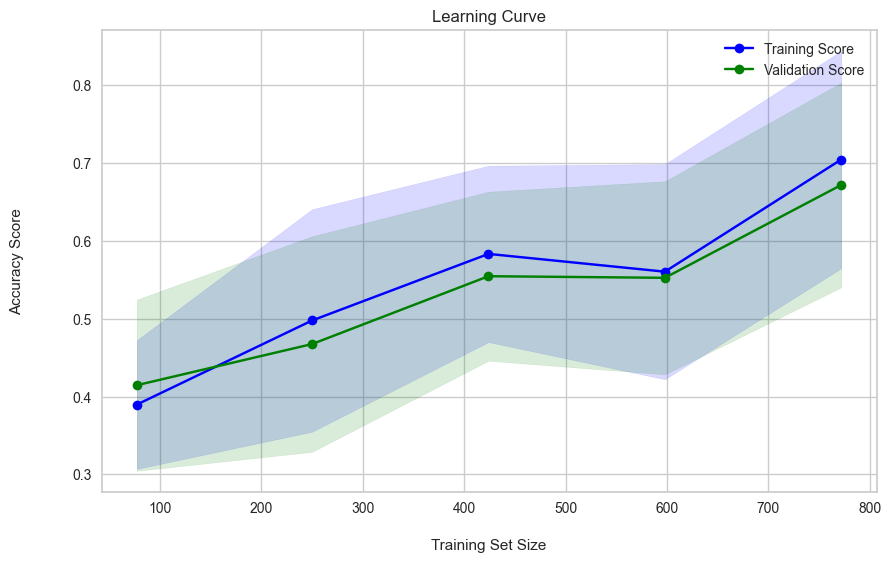

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(mlp,
                                                        data_train,
                                                        target_train,
                                                        cv=5)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training Score')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, 'o-', color='green', label='Validation Score')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy Score')
plt.legend(loc='best')
plt.title('Learning Curve')

# Ajustar la posición de las etiquetas de las funciones de la gráfica
plt.gca().xaxis.set_label_coords(0.5, -0.1)  # Ajustar la posición de la etiqueta del eje x
plt.gca().yaxis.set_label_coords(-0.1, 0.5)  # Ajustar la posición de la etiqueta del eje y
plt.gca().title.set_position([.5, 1.05])  # Ajustar la posición del título

plt.show()

In [37]:
mlp2 = MLPClassifier(hidden_layer_sizes=(5,2), activation='relu', max_iter=2000)
mlp2.fit(data_train,target_train)
y_pred2 = mlp2.predict(data_test)
X_pred2 = mlp2.predict(data_train)
y_pred2

array(['Cara', 'Cara', 'Cara', 'Cara', 'Cara', 'Cara', 'Cara', 'Cara',
       'Cara', 'Cara', 'Cara', 'Cara', 'Cara', 'Cara', 'Cara', 'Cara',
       'Cara', 'Cara', 'Cara', 'Cara', 'Cara', 'Cara', 'Cara', 'Cara',
       'Cara', 'Cara', 'Cara', 'Cara', 'Cara', 'Cara', 'Cara', 'Cara',
       'Cara', 'Cara', 'Cara', 'Cara', 'Cara', 'Cara', 'Cara', 'Cara',
       'Cara', 'Cara', 'Cara', 'Cara', 'Cara', 'Cara', 'Cara', 'Cara',
       'Cara', 'Cara', 'Cara', 'Cara', 'Cara', 'Cara', 'Cara', 'Cara',
       'Cara', 'Cara', 'Cara', 'Cara', 'Cara', 'Cara', 'Cara', 'Cara',
       'Cara', 'Cara', 'Cara', 'Cara', 'Cara', 'Cara', 'Cara', 'Cara',
       'Cara', 'Cara', 'Cara', 'Cara', 'Cara', 'Cara', 'Cara', 'Cara',
       'Cara', 'Cara', 'Cara', 'Cara', 'Cara', 'Cara', 'Cara', 'Cara',
       'Cara', 'Cara', 'Cara', 'Cara', 'Cara', 'Cara', 'Cara', 'Cara',
       'Cara', 'Cara', 'Cara', 'Cara', 'Cara', 'Cara', 'Cara', 'Cara',
       'Cara', 'Cara', 'Cara', 'Cara', 'Cara', 'Cara', 'Cara', 'Cara',
      

In [38]:
cm2 = confusion_matrix(target_test,y_pred2)
accuracy2 = accuracy_score(target_test,y_pred2)
precision2 = precision_score(target_test, y_pred2,average='micro')
recall2 =  recall_score(target_test, y_pred2,average='micro')
f12 = f1_score(target_test,y_pred2,average='micro')
print('Matriz de confusión\n',cm2)
print('Accuracy: ',accuracy2)
print('Precision: ', precision2)
print('recall: ',recall2)

Matriz de confusión
 [[216   0   0]
 [ 86   0   0]
 [113   0   0]]
Accuracy:  0.5204819277108433
Precision:  0.5204819277108433
recall:  0.5204819277108433


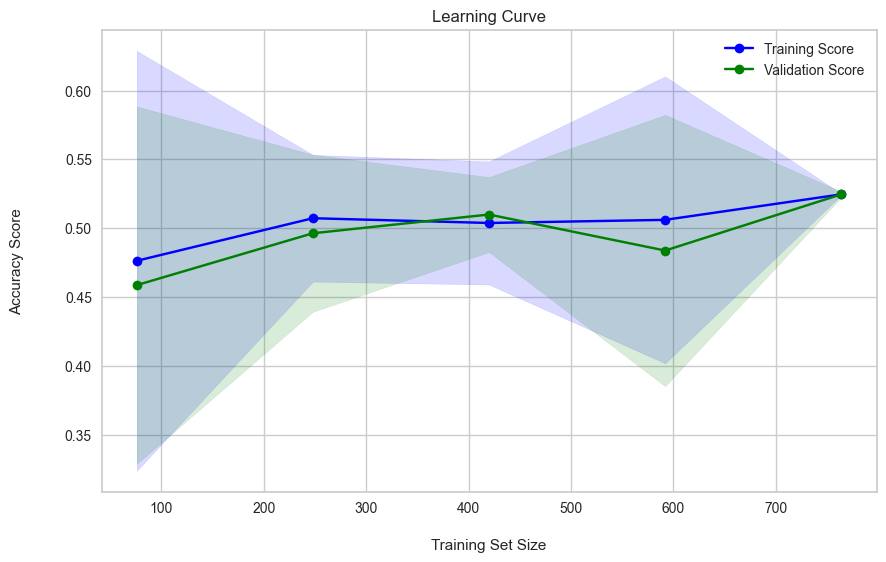

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(mlp2,
                                                        data_train,
                                                        target_train,
                                                        cv=5)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training Score')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, 'o-', color='green', label='Validation Score')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy Score')
plt.legend(loc='best')
plt.title('Learning Curve')

# Ajustar la posición de las etiquetas de las funciones de la gráfica
plt.gca().xaxis.set_label_coords(0.5, -0.1)  # Ajustar la posición de la etiqueta del eje x
plt.gca().yaxis.set_label_coords(-0.1, 0.5)  # Ajustar la posición de la etiqueta del eje y
plt.gca().title.set_position([.5, 1.05])  # Ajustar la posición del título

plt.show()

In [40]:
cm2 = confusion_matrix(target_train,X_pred2)
accuracy2 = accuracy_score(target_train,X_pred2)
precision2 = precision_score(target_train, X_pred2,average='micro')
recall2 =  recall_score(target_train, X_pred2,average='micro')
f12 = f1_score(target_train,X_pred2,average='micro')
print('Matriz de confusión\n',cm2)
print('Accuracy: ',accuracy2)
print('Precision: ', precision2)
print('recall: ',recall2)

Matriz de confusión
 [[501   0   0]
 [213   0   0]
 [241   0   0]]
Accuracy:  0.5246073298429319
Precision:  0.5246073298429319
recall:  0.5246073298429319


In [12]:
preprocesador_categorico = OneHotEncoder(handle_unknown="ignore")
preprocesador_numerico = StandardScaler()

In [13]:
#Creamos los selectores
selector_numericas = selector(dtype_exclude=object) #Seleccionamos todas las variables que no son Object
selector_categoricas = selector(dtype_include=object) #Seleccionamos todas las varibles de tipo object
#Seleccionamos las columnas que cumplen con los selectores pasándole los datos
numericas = selector_numericas(data)
categoricas = selector_categoricas(data)
#veamos que tan bien separó las variables
print("Numéricas: ",numericas)
print("Categóricas: ", categoricas)

Numéricas:  ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'MSZoning_C (all)', 'MSZoning_FV', 'Street_Pave', 'Street_Grvl', 'Alley_NA', 'Alley_Pave', 'Alley_Grvl', 'LotShape_IR2', 'LotShape_Reg', 'LotShape_IR3', 'LotShape_IR1', 'LandContour_Low', 'LandContour_Bnk', 'LandContour_Lvl', 'LandContour_HLS', 'Utilities_AllPub', 'Utilities_NoSeWa', 'LotConfig_CulDSac', 'LotConfig_FR3', 'LotConfig_FR2', 'LotConfig_Corner', 'LotConfig_Inside', 'LandSlope_Gtl', 'LandSlope_Mod', 'LandSlope_Sev', 'Neighborho

In [14]:
preprocesador = ColumnTransformer([
    ('one_hot_encoder',preprocesador_categorico,categoricas),
    ('standard_scaler',preprocesador_numerico, numericas)
])

## Modelo 1 RNA

In [15]:
mlpT = make_pipeline(preprocesador,MLPClassifier(activation="identity",verbose=True,hidden_layer_sizes=(5,3)))
mlpT

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('one_hot_encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  []),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['MSSubClass', 'LotFrontage',
                                                   'LotArea', 'OverallQual',
                                                   'OverallCond', 'YearBuilt',
                                                   'YearRemodAdd', 'MasVnrArea',
                                                   'BsmtFinSF1', 'BsmtFinSF2',
                                                   'BsmtUnfSF', 'TotalBsmtSF',
                                                   '1stFlrSF', '2ndFlrSF',
                                                   'LowQualFinSF', 'GrLivArea',
                                                   'BsmtFullBath',
                                                   'BsmtHalfBath', 'FullBath',
                                                   'HalfBath', 'BedroomAbvGr',
                                                   'KitchenAbvGr',
                                                   'TotRmsAbvGrd', 'Fireplaces',
                                                   'GarageYrBlt', 'GarageCars',
                                                   'GarageArea', 'WoodDeckSF',
                                                   'OpenPorchSF',
                                                   'EnclosedPorch', ...])])),
                ('mlpclassifier',
                 MLPClassifier(activation='identity', hidden_layer_sizes=(5, 3),
                               verbose=True))])

In [16]:
mlpT.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'columntransformer', 'mlpclassifier', 'columntransformer__n_jobs', 'columntransformer__remainder', 'columntransformer__sparse_threshold', 'columntransformer__transformer_weights', 'columntransformer__transformers', 'columntransformer__verbose', 'columntransformer__verbose_feature_names_out', 'columntransformer__one_hot_encoder', 'columntransformer__standard_scaler', 'columntransformer__one_hot_encoder__categories', 'columntransformer__one_hot_encoder__drop', 'columntransformer__one_hot_encoder__dtype', 'columntransformer__one_hot_encoder__feature_name_combiner', 'columntransformer__one_hot_encoder__handle_unknown', 'columntransformer__one_hot_encoder__max_categories', 'columntransformer__one_hot_encoder__min_frequency', 'columntransformer__one_hot_encoder__sparse_output', 'columntransformer__standard_scaler__copy', 'columntransformer__standard_scaler__with_mean', 'columntransformer__standard_scaler__with_std', 'mlpclassifier__activation', 'mlpcl

In [17]:
data_train, data_test, target_train, target_test = train_test_split(
    data, target, train_size=0.7,test_size=0.3)
print("Shape train",data_train.shape)
print("Shape test",data_test.shape)
data_train = data_train.dropna()
target_train = target_train[data_train.index]  # Asegúrate de alinear los objetivos después de eliminar las filas
data_test = data_test.dropna()
target_test = target_test[data_test.index]  # Asegúrate de alinear los objetivos después de eliminar las filas
data.isnull().sum()

Shape train (1021, 301)
Shape test (438, 301)


MSSubClass               0
LotFrontage              0
LotArea                  0
OverallQual              0
OverallCond              0
                        ..
SaleCondition_Normal     0
SaleCondition_Partial    0
SaleCondition_AdjLand    0
SaleCondition_Abnorml    0
SaleCondition_Alloca     0
Length: 301, dtype: int64

In [18]:
mlpT.fit(data_train,target_train)

Iteration 1, loss = 1.84513209
Iteration 2, loss = 1.55896506
Iteration 3, loss = 1.38129140
Iteration 4, loss = 1.25650307
Iteration 5, loss = 1.16643276
Iteration 6, loss = 1.09410362
Iteration 7, loss = 1.03380305
Iteration 8, loss = 0.98102595
Iteration 9, loss = 0.93638007
Iteration 10, loss = 0.89828319
Iteration 11, loss = 0.86211959
Iteration 12, loss = 0.83038979
Iteration 13, loss = 0.80175569
Iteration 14, loss = 0.77556479
Iteration 15, loss = 0.75081195
Iteration 16, loss = 0.72735010
Iteration 17, loss = 0.70677879
Iteration 18, loss = 0.68748906
Iteration 19, loss = 0.66850750
Iteration 20, loss = 0.65090362
Iteration 21, loss = 0.63433011
Iteration 22, loss = 0.61890182
Iteration 23, loss = 0.60460958
Iteration 24, loss = 0.59091499
Iteration 25, loss = 0.57846614
Iteration 26, loss = 0.56617916
Iteration 27, loss = 0.55482231
Iteration 28, loss = 0.54443805
Iteration 29, loss = 0.53420832
Iteration 30, loss = 0.52521210
Iteration 31, loss = 0.51610860
Iteration 32, los

C:\Users\danar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('one_hot_encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  []),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['MSSubClass', 'LotFrontage',
                                                   'LotArea', 'OverallQual',
                                                   'OverallCond', 'YearBuilt',
                                                   'YearRemodAdd', 'MasVnrArea',
                                                   'BsmtFinSF1', 'BsmtFinSF2',
                                                   'BsmtUnfSF', 'TotalBsmtSF',
                                                   '1stFlrSF', '2ndFlrSF',
                                                   'LowQualFinSF', 'GrLivArea',
                                                   'BsmtFullBath',
                                                   'BsmtHalfBath', 'FullBath',
                                                   'HalfBath', 'BedroomAbvGr',
                                                   'KitchenAbvGr',
                                                   'TotRmsAbvGrd', 'Fireplaces',
                                                   'GarageYrBlt', 'GarageCars',
                                                   'GarageArea', 'WoodDeckSF',
                                                   'OpenPorchSF',
                                                   'EnclosedPorch', ...])])),
                ('mlpclassifier',
                 MLPClassifier(activation='identity', hidden_layer_sizes=(5, 3),
                               verbose=True))])

In [19]:
ypredM = mlpT.predict(data_train)
cmT = confusion_matrix(target_train,ypredM)
accuracyT = accuracy_score(target_train,ypredM)
precisionT = precision_score(target_train, ypredM,average='micro')
recallT =  recall_score(target_train, ypredM,average='micro')
f1T = f1_score(target_train,ypredM,average='micro')
print('Matriz de confusión\n',cmT)
print('Accuracy: ',accuracyT)
print('Precision: ', precisionT)
print('recall: ',recallT)


Matriz de confusión
 [[498   1   2]
 [  0 195  20]
 [  5  15 218]]
Accuracy:  0.9549266247379455
Precision:  0.9549266247379455
recall:  0.9549266247379455


In [20]:
ypredM = mlpT.predict(data_test)
cmT = confusion_matrix(target_test,ypredM)
accuracyT = accuracy_score(target_test,ypredM)
precisionT = precision_score(target_test, ypredM,average='micro')
recallT =  recall_score(target_test, ypredM,average='micro')
f1T = f1_score(target_test,ypredM,average='micro')
print('Matriz de confusión\n',cmT)
print('Accuracy: ',accuracyT)
print('Precision: ', precisionT)
print('recall: ',recallT)


Matriz de confusión
 [[198   6  11]
 [  2  66  16]
 [ 19  36  62]]
Accuracy:  0.7836538461538461
Precision:  0.7836538461538461
recall:  0.7836538461538461


Iteration 1, loss = 1.70898361
Iteration 2, loss = 1.67673468
Iteration 3, loss = 1.64553621
Iteration 4, loss = 1.61528055
Iteration 5, loss = 1.58586105
Iteration 6, loss = 1.55720605
Iteration 7, loss = 1.52925297
Iteration 8, loss = 1.50194133
Iteration 9, loss = 1.47521899
Iteration 10, loss = 1.44904453
Iteration 11, loss = 1.42338397
Iteration 12, loss = 1.39820751
Iteration 13, loss = 1.37348808
Iteration 14, loss = 1.34920136
Iteration 15, loss = 1.32532614
Iteration 16, loss = 1.30184453
Iteration 17, loss = 1.27874178
Iteration 18, loss = 1.25600584
Iteration 19, loss = 1.23362678
Iteration 20, loss = 1.21159604
Iteration 21, loss = 1.18990579
Iteration 22, loss = 1.16854833
Iteration 23, loss = 1.14751553
Iteration 24, loss = 1.12679849
Iteration 25, loss = 1.10638722
Iteration 26, loss = 1.08627068
Iteration 27, loss = 1.06643676
Iteration 28, loss = 1.04687258
Iteration 29, loss = 1.02756482
Iteration 30, loss = 1.00850008
Iteration 31, loss = 0.98966531
Iteration 32, los

C:\Users\danar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\danar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 139, loss = 0.11109628
Iteration 140, loss = 0.10949439
Iteration 141, loss = 0.10802047
Iteration 142, loss = 0.10642289
Iteration 143, loss = 0.10493048
Iteration 144, loss = 0.10328819
Iteration 145, loss = 0.10196218
Iteration 146, loss = 0.10046177
Iteration 147, loss = 0.09908277
Iteration 148, loss = 0.09769248
Iteration 149, loss = 0.09625635
Iteration 150, loss = 0.09504205
Iteration 151, loss = 0.09366600
Iteration 152, loss = 0.09252080
Iteration 153, loss = 0.09144868
Iteration 154, loss = 0.09017738
Iteration 155, loss = 0.08901219
Iteration 156, loss = 0.08783493
Iteration 157, loss = 0.08666917
Iteration 158, loss = 0.08546782
Iteration 159, loss = 0.08424430
Iteration 160, loss = 0.08306236
Iteration 161, loss = 0.08203918
Iteration 162, loss = 0.08086624
Iteration 163, loss = 0.07979009
Iteration 164, loss = 0.07876573
Iteration 165, loss = 0.07769415
Iteration 166, loss = 0.07674656
Iteration 167, loss = 0.07570338
Iteration 168, loss = 0.07470738
Iteration 

C:\Users\danar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.33622346
Iteration 2, loss = 1.20816160
Iteration 3, loss = 1.10292729
Iteration 4, loss = 1.02254642
Iteration 5, loss = 0.96026555
Iteration 6, loss = 0.90958323
Iteration 7, loss = 0.86585902
Iteration 8, loss = 0.82837551
Iteration 9, loss = 0.79425495
Iteration 10, loss = 0.76380735
Iteration 11, loss = 0.73374871
Iteration 12, loss = 0.70776009
Iteration 13, loss = 0.68253908
Iteration 14, loss = 0.65978284
Iteration 15, loss = 0.63660859
Iteration 16, loss = 0.61494770
Iteration 17, loss = 0.59600328
Iteration 18, loss = 0.57715568
Iteration 19, loss = 0.55990318
Iteration 20, loss = 0.54306679
Iteration 21, loss = 0.52813416
Iteration 22, loss = 0.51350180
Iteration 23, loss = 0.50002813
Iteration 24, loss = 0.48665814
Iteration 25, loss = 0.47480184
Iteration 26, loss = 0.46348929
Iteration 27, loss = 0.45237236
Iteration 28, loss = 0.44219746
Iteration 29, loss = 0.43240346
Iteration 30, loss = 0.42303555
Iteration 31, loss = 0.41420217
Iteration 32, los

C:\Users\danar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 8, loss = 1.26512885
Iteration 9, loss = 1.18310859
Iteration 10, loss = 1.11110446
Iteration 11, loss = 1.04953660
Iteration 12, loss = 0.98913945
Iteration 13, loss = 0.93816731
Iteration 14, loss = 0.89376515
Iteration 15, loss = 0.85327364
Iteration 16, loss = 0.81553073
Iteration 17, loss = 0.78281551
Iteration 18, loss = 0.75245188
Iteration 19, loss = 0.72482300
Iteration 20, loss = 0.69962990
Iteration 21, loss = 0.67592618
Iteration 22, loss = 0.65433252
Iteration 23, loss = 0.63536301
Iteration 24, loss = 0.61735779
Iteration 25, loss = 0.60071727
Iteration 26, loss = 0.58562512
Iteration 27, loss = 0.57137751
Iteration 28, loss = 0.55820192
Iteration 29, loss = 0.54580378
Iteration 30, loss = 0.53418595
Iteration 31, loss = 0.52281903
Iteration 32, loss = 0.51296529
Iteration 33, loss = 0.50264491
Iteration 34, loss = 0.49339775
Iteration 35, loss = 0.48458216
Iteration 36, loss = 0.47606054
Iteration 37, loss = 0.46785107
Iteration 38, loss = 0.46043681
Iteration 

C:\Users\danar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\danar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.00002905
Iteration 2, loss = 1.87759107
Iteration 3, loss = 1.76844061
Iteration 4, loss = 1.66911495
Iteration 5, loss = 1.57870810
Iteration 6, loss = 1.49673358
Iteration 7, loss = 1.42173678
Iteration 8, loss = 1.35449708
Iteration 9, loss = 1.29415847
Iteration 10, loss = 1.24036572
Iteration 11, loss = 1.19085460
Iteration 12, loss = 1.14494473
Iteration 13, loss = 1.10380304
Iteration 14, loss = 1.06438054
Iteration 15, loss = 1.02934563
Iteration 16, loss = 0.99572901
Iteration 17, loss = 0.96388661
Iteration 18, loss = 0.93386328
Iteration 19, loss = 0.90499702
Iteration 20, loss = 0.87762981
Iteration 21, loss = 0.85078090
Iteration 22, loss = 0.82767109
Iteration 23, loss = 0.80219174
Iteration 24, loss = 0.77944174
Iteration 25, loss = 0.75646377
Iteration 26, loss = 0.73544503
Iteration 27, loss = 0.71454162
Iteration 28, loss = 0.69493103
Iteration 29, loss = 0.67572816
Iteration 30, loss = 0.65689704
Iteration 31, loss = 0.64006165
Iteration 32, los

C:\Users\danar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.48853678
Iteration 2, loss = 1.37440771
Iteration 3, loss = 1.28739689
Iteration 4, loss = 1.22383329
Iteration 5, loss = 1.17069238
Iteration 6, loss = 1.12440052
Iteration 7, loss = 1.08178018
Iteration 8, loss = 1.04188789
Iteration 9, loss = 1.00409540
Iteration 10, loss = 0.96922284
Iteration 11, loss = 0.93634410
Iteration 12, loss = 0.90499329
Iteration 13, loss = 0.87554434
Iteration 14, loss = 0.84723227
Iteration 15, loss = 0.82163356
Iteration 16, loss = 0.79750137
Iteration 17, loss = 0.77519921
Iteration 18, loss = 0.75252495
Iteration 19, loss = 0.73188683
Iteration 20, loss = 0.71167225
Iteration 21, loss = 0.69342705
Iteration 22, loss = 0.67511037
Iteration 23, loss = 0.65826366
Iteration 24, loss = 0.64237336
Iteration 25, loss = 0.62742981
Iteration 26, loss = 0.61256268
Iteration 27, loss = 0.59878092
Iteration 28, loss = 0.58657946
Iteration 29, loss = 0.57352580
Iteration 30, loss = 0.56227456
Iteration 31, loss = 0.55121515
Iteration 32, los

C:\Users\danar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 17, loss = 0.69216065
Iteration 18, loss = 0.66967777
Iteration 19, loss = 0.64877028
Iteration 20, loss = 0.62907901
Iteration 21, loss = 0.61137799
Iteration 22, loss = 0.59553819
Iteration 23, loss = 0.58015049
Iteration 24, loss = 0.56622455
Iteration 25, loss = 0.55357586
Iteration 26, loss = 0.54178638
Iteration 27, loss = 0.53060461
Iteration 28, loss = 0.51992160
Iteration 29, loss = 0.50985272
Iteration 30, loss = 0.50023946
Iteration 31, loss = 0.49099822
Iteration 32, loss = 0.48186439
Iteration 33, loss = 0.47330487
Iteration 34, loss = 0.46507866
Iteration 35, loss = 0.45713069
Iteration 36, loss = 0.44956649
Iteration 37, loss = 0.44166872
Iteration 38, loss = 0.43432043
Iteration 39, loss = 0.42731630
Iteration 40, loss = 0.42035109
Iteration 41, loss = 0.41391198
Iteration 42, loss = 0.40731158
Iteration 43, loss = 0.40097430
Iteration 44, loss = 0.39498527
Iteration 45, loss = 0.38900564
Iteration 46, loss = 0.38292276
Iteration 47, loss = 0.37726123
Iteratio

C:\Users\danar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 18, loss = 0.56577721
Iteration 19, loss = 0.54933232
Iteration 20, loss = 0.53366246
Iteration 21, loss = 0.51900865
Iteration 22, loss = 0.50604145
Iteration 23, loss = 0.49436742
Iteration 24, loss = 0.48268216
Iteration 25, loss = 0.47240032
Iteration 26, loss = 0.46277277
Iteration 27, loss = 0.45304279
Iteration 28, loss = 0.44445851
Iteration 29, loss = 0.43584099
Iteration 30, loss = 0.42790524
Iteration 31, loss = 0.42063166
Iteration 32, loss = 0.41316307
Iteration 33, loss = 0.40610160
Iteration 34, loss = 0.39963320
Iteration 35, loss = 0.39312788
Iteration 36, loss = 0.38740840
Iteration 37, loss = 0.38124616
Iteration 38, loss = 0.37561577
Iteration 39, loss = 0.37018635
Iteration 40, loss = 0.36495008
Iteration 41, loss = 0.35984163
Iteration 42, loss = 0.35486271
Iteration 43, loss = 0.34995449
Iteration 44, loss = 0.34549631
Iteration 45, loss = 0.34089935
Iteration 46, loss = 0.33687362
Iteration 47, loss = 0.33268262
Iteration 48, loss = 0.32857586
Iteratio

C:\Users\danar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\danar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 87, loss = 0.24322240
Iteration 88, loss = 0.23899185
Iteration 89, loss = 0.23482003
Iteration 90, loss = 0.23070635
Iteration 91, loss = 0.22665028
Iteration 92, loss = 0.22265131
Iteration 93, loss = 0.21870895
Iteration 94, loss = 0.21482273
Iteration 95, loss = 0.21099223
Iteration 96, loss = 0.20721702
Iteration 97, loss = 0.20349671
Iteration 98, loss = 0.19983092
Iteration 99, loss = 0.19621927
Iteration 100, loss = 0.19266142
Iteration 101, loss = 0.18915701
Iteration 102, loss = 0.18570572
Iteration 103, loss = 0.18230720
Iteration 104, loss = 0.17896113
Iteration 105, loss = 0.17566719
Iteration 106, loss = 0.17242504
Iteration 107, loss = 0.16923436
Iteration 108, loss = 0.16609482
Iteration 109, loss = 0.16300608
Iteration 110, loss = 0.15996780
Iteration 111, loss = 0.15697963
Iteration 112, loss = 0.15404122
Iteration 113, loss = 0.15115221
Iteration 114, loss = 0.14831221
Iteration 115, loss = 0.14552086
Iteration 116, loss = 0.14277775
Iteration 117, loss = 0

C:\Users\danar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 29, loss = 0.63879966
Iteration 30, loss = 0.61932486
Iteration 31, loss = 0.59978237
Iteration 32, loss = 0.58076537
Iteration 33, loss = 0.56269528
Iteration 34, loss = 0.54396258
Iteration 35, loss = 0.52593037
Iteration 36, loss = 0.51122108
Iteration 37, loss = 0.49822589
Iteration 38, loss = 0.48506001
Iteration 39, loss = 0.47397609
Iteration 40, loss = 0.46228434
Iteration 41, loss = 0.45166434
Iteration 42, loss = 0.44043409
Iteration 43, loss = 0.43112017
Iteration 44, loss = 0.42146297
Iteration 45, loss = 0.41195994
Iteration 46, loss = 0.40359139
Iteration 47, loss = 0.39476427
Iteration 48, loss = 0.38731114
Iteration 49, loss = 0.38007461
Iteration 50, loss = 0.37262994
Iteration 51, loss = 0.36569966
Iteration 52, loss = 0.35894987
Iteration 53, loss = 0.35409753
Iteration 54, loss = 0.34932721
Iteration 55, loss = 0.34479326
Iteration 56, loss = 0.34041160
Iteration 57, loss = 0.33507712
Iteration 58, loss = 0.32899894
Iteration 59, loss = 0.32317972
Iteratio

C:\Users\danar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 12, loss = 0.88273808
Iteration 13, loss = 0.84215129
Iteration 14, loss = 0.80409041
Iteration 15, loss = 0.76970267
Iteration 16, loss = 0.73535319
Iteration 17, loss = 0.70490175
Iteration 18, loss = 0.67516607
Iteration 19, loss = 0.64902468
Iteration 20, loss = 0.62241696
Iteration 21, loss = 0.59842551
Iteration 22, loss = 0.57687106
Iteration 23, loss = 0.55563131
Iteration 24, loss = 0.53650981
Iteration 25, loss = 0.51735343
Iteration 26, loss = 0.50128187
Iteration 27, loss = 0.48470390
Iteration 28, loss = 0.46877691
Iteration 29, loss = 0.45490148
Iteration 30, loss = 0.44082681
Iteration 31, loss = 0.42792723
Iteration 32, loss = 0.41633825
Iteration 33, loss = 0.40532183
Iteration 34, loss = 0.39508051
Iteration 35, loss = 0.38508357
Iteration 36, loss = 0.37633198
Iteration 37, loss = 0.36712648
Iteration 38, loss = 0.35930663
Iteration 39, loss = 0.35136948
Iteration 40, loss = 0.34393828
Iteration 41, loss = 0.33746233
Iteration 42, loss = 0.33081010
Iteratio

C:\Users\danar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 54, loss = 0.27856730
Iteration 55, loss = 0.27559508
Iteration 56, loss = 0.27279220
Iteration 57, loss = 0.27015601
Iteration 58, loss = 0.26744384
Iteration 59, loss = 0.26479152
Iteration 60, loss = 0.26236396
Iteration 61, loss = 0.25978276
Iteration 62, loss = 0.25736949
Iteration 63, loss = 0.25497467
Iteration 64, loss = 0.25267890
Iteration 65, loss = 0.25035342
Iteration 66, loss = 0.24811654
Iteration 67, loss = 0.24611910
Iteration 68, loss = 0.24374591
Iteration 69, loss = 0.24160284
Iteration 70, loss = 0.23950492
Iteration 71, loss = 0.23755912
Iteration 72, loss = 0.23545208
Iteration 73, loss = 0.23349053
Iteration 74, loss = 0.23145666
Iteration 75, loss = 0.22959394
Iteration 76, loss = 0.22765598
Iteration 77, loss = 0.22571712
Iteration 78, loss = 0.22393520
Iteration 79, loss = 0.22213695
Iteration 80, loss = 0.22026954
Iteration 81, loss = 0.21851819
Iteration 82, loss = 0.21683187
Iteration 83, loss = 0.21503977
Iteration 84, loss = 0.21335529
Iteratio

C:\Users\danar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 60, loss = 0.14044333
Iteration 61, loss = 0.13621612
Iteration 62, loss = 0.13216348
Iteration 63, loss = 0.12827625
Iteration 64, loss = 0.12454572
Iteration 65, loss = 0.12096364
Iteration 66, loss = 0.11752215
Iteration 67, loss = 0.11421387
Iteration 68, loss = 0.11103186
Iteration 69, loss = 0.10796962
Iteration 70, loss = 0.10502115
Iteration 71, loss = 0.10218085
Iteration 72, loss = 0.09944357
Iteration 73, loss = 0.09680454
Iteration 74, loss = 0.09425938
Iteration 75, loss = 0.09180402
Iteration 76, loss = 0.08943466
Iteration 77, loss = 0.08714779
Iteration 78, loss = 0.08494007
Iteration 79, loss = 0.08280837
Iteration 80, loss = 0.08074971
Iteration 81, loss = 0.07876124
Iteration 82, loss = 0.07684022
Iteration 83, loss = 0.07498403
Iteration 84, loss = 0.07319013
Iteration 85, loss = 0.07145607
Iteration 86, loss = 0.06977949
Iteration 87, loss = 0.06815812
Iteration 88, loss = 0.06658975
Iteration 89, loss = 0.06507228
Iteration 90, loss = 0.06360369
Iteratio

C:\Users\danar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.93427178
Iteration 2, loss = 1.75874294
Iteration 3, loss = 1.61969388
Iteration 4, loss = 1.49999428
Iteration 5, loss = 1.39838143
Iteration 6, loss = 1.31587464
Iteration 7, loss = 1.24274222
Iteration 8, loss = 1.17684748
Iteration 9, loss = 1.12151224
Iteration 10, loss = 1.07089655
Iteration 11, loss = 1.02248407
Iteration 12, loss = 0.98139703
Iteration 13, loss = 0.93949493
Iteration 14, loss = 0.90166671
Iteration 15, loss = 0.86472980
Iteration 16, loss = 0.83145454
Iteration 17, loss = 0.79806672
Iteration 18, loss = 0.76740183
Iteration 19, loss = 0.73918370
Iteration 20, loss = 0.71275706
Iteration 21, loss = 0.68680706
Iteration 22, loss = 0.66395046
Iteration 23, loss = 0.64103176
Iteration 24, loss = 0.62115283
Iteration 25, loss = 0.60146203
Iteration 26, loss = 0.58390548
Iteration 27, loss = 0.56638821
Iteration 28, loss = 0.55048706
Iteration 29, loss = 0.53570938
Iteration 30, loss = 0.52167068
Iteration 31, loss = 0.50843395
Iteration 32, los

C:\Users\danar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.30151012
Iteration 2, loss = 1.18041661
Iteration 3, loss = 1.08958701
Iteration 4, loss = 1.01040806
Iteration 5, loss = 0.94371204
Iteration 6, loss = 0.88867764
Iteration 7, loss = 0.84290896
Iteration 8, loss = 0.80430244
Iteration 9, loss = 0.77198718
Iteration 10, loss = 0.74417739
Iteration 11, loss = 0.71963863
Iteration 12, loss = 0.69867736
Iteration 13, loss = 0.67769200
Iteration 14, loss = 0.65939452
Iteration 15, loss = 0.64217076
Iteration 16, loss = 0.62520053
Iteration 17, loss = 0.61053539
Iteration 18, loss = 0.59671146
Iteration 19, loss = 0.58326826
Iteration 20, loss = 0.57113780
Iteration 21, loss = 0.55910953
Iteration 22, loss = 0.54820294
Iteration 23, loss = 0.53733051
Iteration 24, loss = 0.52733318
Iteration 25, loss = 0.51763804
Iteration 26, loss = 0.50848386
Iteration 27, loss = 0.49951058
Iteration 28, loss = 0.49077351
Iteration 29, loss = 0.48210873
Iteration 30, loss = 0.47381607
Iteration 31, loss = 0.46584046
Iteration 32, los

C:\Users\danar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 37, loss = 0.44915289
Iteration 38, loss = 0.44047990
Iteration 39, loss = 0.43198231
Iteration 40, loss = 0.42448022
Iteration 41, loss = 0.41703275
Iteration 42, loss = 0.41021260
Iteration 43, loss = 0.40396744
Iteration 44, loss = 0.39718735
Iteration 45, loss = 0.39173732
Iteration 46, loss = 0.38587345
Iteration 47, loss = 0.38032937
Iteration 48, loss = 0.37525716
Iteration 49, loss = 0.36997931
Iteration 50, loss = 0.36509395
Iteration 51, loss = 0.36052038
Iteration 52, loss = 0.35586586
Iteration 53, loss = 0.35105622
Iteration 54, loss = 0.34685875
Iteration 55, loss = 0.34256168
Iteration 56, loss = 0.33869740
Iteration 57, loss = 0.33415874
Iteration 58, loss = 0.33048737
Iteration 59, loss = 0.32638378
Iteration 60, loss = 0.32286301
Iteration 61, loss = 0.31890108
Iteration 62, loss = 0.31528326
Iteration 63, loss = 0.31173540
Iteration 64, loss = 0.30827487
Iteration 65, loss = 0.30484227
Iteration 66, loss = 0.30136202
Iteration 67, loss = 0.29797095
Iteratio

C:\Users\danar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.54690654
Iteration 2, loss = 1.37196219
Iteration 3, loss = 1.23046804
Iteration 4, loss = 1.11440069
Iteration 5, loss = 1.01237048
Iteration 6, loss = 0.92937288
Iteration 7, loss = 0.85864454
Iteration 8, loss = 0.79878227
Iteration 9, loss = 0.74946928
Iteration 10, loss = 0.70555830
Iteration 11, loss = 0.66925003
Iteration 12, loss = 0.63910580
Iteration 13, loss = 0.61005860
Iteration 14, loss = 0.58574723
Iteration 15, loss = 0.56268630
Iteration 16, loss = 0.54349719
Iteration 17, loss = 0.52475392
Iteration 18, loss = 0.50842670
Iteration 19, loss = 0.49301972
Iteration 20, loss = 0.47851790
Iteration 21, loss = 0.46537421
Iteration 22, loss = 0.45326885
Iteration 23, loss = 0.44176034
Iteration 24, loss = 0.43123335
Iteration 25, loss = 0.42100102
Iteration 26, loss = 0.41124380
Iteration 27, loss = 0.40246505
Iteration 28, loss = 0.39438070
Iteration 29, loss = 0.38644934
Iteration 30, loss = 0.37890678
Iteration 31, loss = 0.37183836
Iteration 32, los

C:\Users\danar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.86497509
Iteration 2, loss = 1.76766256
Iteration 3, loss = 1.67549638
Iteration 4, loss = 1.58848878
Iteration 5, loss = 1.50661097
Iteration 6, loss = 1.42984757
Iteration 7, loss = 1.35815671
Iteration 8, loss = 1.29146099
Iteration 9, loss = 1.22964361
Iteration 10, loss = 1.17253549
Iteration 11, loss = 1.11990486
Iteration 12, loss = 1.07145565
Iteration 13, loss = 1.02683535
Iteration 14, loss = 0.98565186
Iteration 15, loss = 0.94749707
Iteration 16, loss = 0.91197190
Iteration 17, loss = 0.87870863
Iteration 18, loss = 0.84738769
Iteration 19, loss = 0.81774838
Iteration 20, loss = 0.78959400
Iteration 21, loss = 0.76279116
Iteration 22, loss = 0.73726178
Iteration 23, loss = 0.71296530
Iteration 24, loss = 0.68987210
Iteration 25, loss = 0.66793596
Iteration 26, loss = 0.64707857
Iteration 27, loss = 0.62719319
Iteration 28, loss = 0.60816274
Iteration 29, loss = 0.58987942
Iteration 30, loss = 0.57225644
Iteration 31, loss = 0.55523044
Iteration 32, los

C:\Users\danar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 16, loss = 0.99222403
Iteration 17, loss = 0.96588534
Iteration 18, loss = 0.94097928
Iteration 19, loss = 0.91655724
Iteration 20, loss = 0.89346245
Iteration 21, loss = 0.87086190
Iteration 22, loss = 0.84968993
Iteration 23, loss = 0.82840650
Iteration 24, loss = 0.80860353
Iteration 25, loss = 0.78924629
Iteration 26, loss = 0.77077025
Iteration 27, loss = 0.75270331
Iteration 28, loss = 0.73534511
Iteration 29, loss = 0.71885039
Iteration 30, loss = 0.70217435
Iteration 31, loss = 0.68686370
Iteration 32, loss = 0.67136264
Iteration 33, loss = 0.65675515
Iteration 34, loss = 0.64237575
Iteration 35, loss = 0.62859841
Iteration 36, loss = 0.61479731
Iteration 37, loss = 0.60120434
Iteration 38, loss = 0.58847696
Iteration 39, loss = 0.57561901
Iteration 40, loss = 0.56340702
Iteration 41, loss = 0.55123478
Iteration 42, loss = 0.53968237
Iteration 43, loss = 0.52847151
Iteration 44, loss = 0.51739342
Iteration 45, loss = 0.50696811
Iteration 46, loss = 0.49659578
Iteratio

C:\Users\danar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 11, loss = 0.66796488
Iteration 12, loss = 0.64692403
Iteration 13, loss = 0.62941321
Iteration 14, loss = 0.61259180
Iteration 15, loss = 0.59725488
Iteration 16, loss = 0.58334525
Iteration 17, loss = 0.57031795
Iteration 18, loss = 0.55809088
Iteration 19, loss = 0.54611323
Iteration 20, loss = 0.53486309
Iteration 21, loss = 0.52380800
Iteration 22, loss = 0.51377633
Iteration 23, loss = 0.50379227
Iteration 24, loss = 0.49364223
Iteration 25, loss = 0.48431577
Iteration 26, loss = 0.47515174
Iteration 27, loss = 0.46620629
Iteration 28, loss = 0.45787520
Iteration 29, loss = 0.44951636
Iteration 30, loss = 0.44172257
Iteration 31, loss = 0.43452762
Iteration 32, loss = 0.42786095
Iteration 33, loss = 0.42067392
Iteration 34, loss = 0.41363530
Iteration 35, loss = 0.40606127
Iteration 36, loss = 0.39942111
Iteration 37, loss = 0.39370282
Iteration 38, loss = 0.38791136
Iteration 39, loss = 0.38262670
Iteration 40, loss = 0.37726850
Iteration 41, loss = 0.37163988
Iteratio

C:\Users\danar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 14, loss = 0.75641272
Iteration 15, loss = 0.72485641
Iteration 16, loss = 0.69472767
Iteration 17, loss = 0.66682672
Iteration 18, loss = 0.64144591
Iteration 19, loss = 0.61793061
Iteration 20, loss = 0.59564795
Iteration 21, loss = 0.57436487
Iteration 22, loss = 0.55688775
Iteration 23, loss = 0.53855001
Iteration 24, loss = 0.52292038
Iteration 25, loss = 0.50678952
Iteration 26, loss = 0.49329779
Iteration 27, loss = 0.48007258
Iteration 28, loss = 0.46660822
Iteration 29, loss = 0.45502241
Iteration 30, loss = 0.44366409
Iteration 31, loss = 0.43353444
Iteration 32, loss = 0.42359744
Iteration 33, loss = 0.41414294
Iteration 34, loss = 0.40500105
Iteration 35, loss = 0.39650191
Iteration 36, loss = 0.38851692
Iteration 37, loss = 0.38058709
Iteration 38, loss = 0.37307612
Iteration 39, loss = 0.36597931
Iteration 40, loss = 0.35901267
Iteration 41, loss = 0.35262388
Iteration 42, loss = 0.34583315
Iteration 43, loss = 0.34014660
Iteration 44, loss = 0.33366970
Iteratio

C:\Users\danar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.81751246
Iteration 2, loss = 1.59713640
Iteration 3, loss = 1.40973589
Iteration 4, loss = 1.25454530
Iteration 5, loss = 1.12268333
Iteration 6, loss = 1.01685353
Iteration 7, loss = 0.92588207
Iteration 8, loss = 0.84697153
Iteration 9, loss = 0.78047628
Iteration 10, loss = 0.72619922
Iteration 11, loss = 0.67840633
Iteration 12, loss = 0.63825711
Iteration 13, loss = 0.60353986
Iteration 14, loss = 0.57326015
Iteration 15, loss = 0.54711671
Iteration 16, loss = 0.52238165
Iteration 17, loss = 0.50275944
Iteration 18, loss = 0.48276267
Iteration 19, loss = 0.46747882
Iteration 20, loss = 0.45163844
Iteration 21, loss = 0.43766432
Iteration 22, loss = 0.42516809
Iteration 23, loss = 0.41303605
Iteration 24, loss = 0.40206681
Iteration 25, loss = 0.39246772
Iteration 26, loss = 0.38200298
Iteration 27, loss = 0.37381394
Iteration 28, loss = 0.36579989
Iteration 29, loss = 0.35816687
Iteration 30, loss = 0.35086209
Iteration 31, loss = 0.34430855
Iteration 32, los

C:\Users\danar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


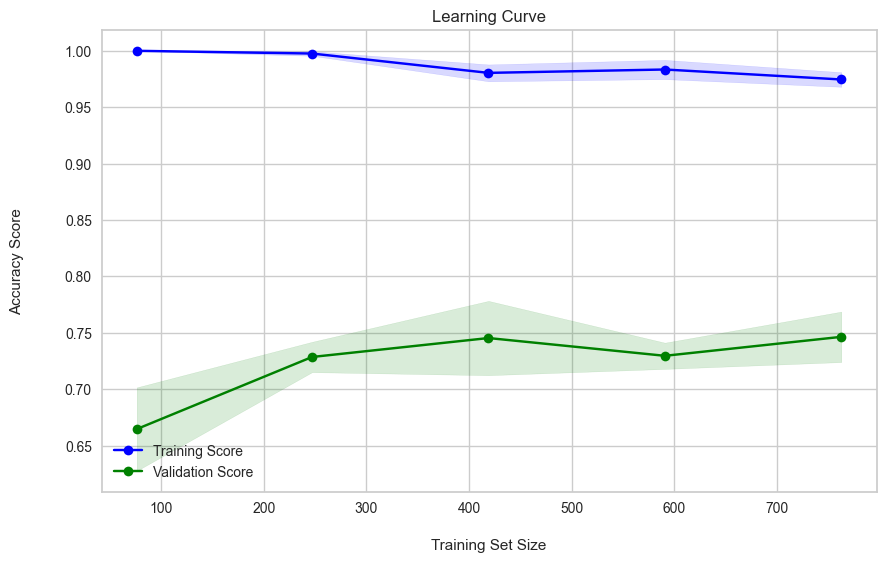

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(mlpT,
                                                        data_train,
                                                        target_train,
                                                        cv=5)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training Score')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, 'o-', color='green', label='Validation Score')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy Score')
plt.legend(loc='best')
plt.title('Learning Curve')

# Ajustar la posición de las etiquetas de las funciones de la gráfica
plt.gca().xaxis.set_label_coords(0.5, -0.1)  # Ajustar la posición de la etiqueta del eje x
plt.gca().yaxis.set_label_coords(-0.1, 0.5)  # Ajustar la posición de la etiqueta del eje y
plt.gca().title.set_position([.5, 1.05])  # Ajustar la posición del título

plt.show()

## Tuneo de Parametros

In [22]:
parametros_tun  = param_grid = {
    'mlpclassifier__max_iter': (100,200,500,1000),
    'mlpclassifier__learning_rate_init': (0.01, 0.1, 1,10),
    'mlpclassifier__hidden_layer_sizes':((3,2),(5,3),(10,2))}
model_grid_search = GridSearchCV(mlpT, param_grid=parametros_tun,
                                 n_jobs=2, cv=10) #Vamos a usar dos procesadores(n_jobs), y 10 k-folds
model_grid_search.fit(data_train, target_train)

Iteration 1, loss = 2.34797517
Iteration 2, loss = 0.86476714
Iteration 3, loss = 0.56886309
Iteration 4, loss = 0.44508872
Iteration 5, loss = 0.38663591
Iteration 6, loss = 0.33192617
Iteration 7, loss = 0.27331097
Iteration 8, loss = 0.25723565
Iteration 9, loss = 0.23764604
Iteration 10, loss = 0.21956139
Iteration 11, loss = 0.21249236
Iteration 12, loss = 0.19493279
Iteration 13, loss = 0.20292255
Iteration 14, loss = 0.19022545
Iteration 15, loss = 0.18479864
Iteration 16, loss = 0.17871435
Iteration 17, loss = 0.20112534
Iteration 18, loss = 0.18834789
Iteration 19, loss = 0.18147546
Iteration 20, loss = 0.15582427
Iteration 21, loss = 0.16469223
Iteration 22, loss = 0.13961052
Iteration 23, loss = 0.14261786
Iteration 24, loss = 0.14839824
Iteration 25, loss = 0.14840426
Iteration 26, loss = 0.14543329
Iteration 27, loss = 0.15914243
Iteration 28, loss = 0.17371837
Iteration 29, loss = 0.19098595
Iteration 30, loss = 0.17053643
Iteration 31, loss = 0.18927441
Iteration 32, los

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('one_hot_encoder',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         []),
                                                                        ('standard_scaler',
                                                                         StandardScaler(),
                                                                         ['MSSubClass',
                                                                          'LotFrontage',
                                                                          'LotArea',
                                                                          'OverallQual',
                                                                          'OverallCond',
                                                                          'YearBuilt',
                                                                          'YearRemodAdd',
                                                                          'MasVnrArea',
                                                                          'BsmtFinSF1',
                                                                          'BsmtFinSF2',
                                                                          'BsmtUnfSF',
                                                                          'TotalBsmt...
                                                                          'GarageYrBlt',
                                                                          'GarageCars',
                                                                          'GarageArea',
                                                                          'WoodDeckSF',
                                                                          'OpenPorchSF',
                                                                          'EnclosedPorch', ...])])),
                                       ('mlpclassifier',
                                        MLPClassifier(activation='identity',
                                                      hidden_layer_sizes=(5, 3),
                                                      verbose=True))]),
             n_jobs=2,
             param_grid={'mlpclassifier__hidden_layer_sizes': ((3, 2), (5, 3),
                                                               (10, 2)),
                         'mlpclassifier__learning_rate_init': (0.01, 0.1, 1,
                                                               10),
                         'mlpclassifier__max_iter': (100, 200, 500, 1000)})

In [23]:
ypredMT = model_grid_search.predict(data_train)
cmTM = confusion_matrix(target_train,ypredMT)
accuracyTM = accuracy_score(target_train,ypredMT)
precisionTM = precision_score(target_train, ypredMT,average='micro')
recallTM = recall_score(target_train, ypredMT,average='micro')
f1TM = f1_score(target_train,ypredMT,average='micro')
print('Matriz de confusión\n',cmT)
print('Accuracy: ',accuracyT)
print('Precision: ', precisionT)
print('recall: ',recallT)

Matriz de confusión
 [[198   6  11]
 [  2  66  16]
 [ 19  36  62]]
Accuracy:  0.7836538461538461
Precision:  0.7836538461538461
recall:  0.7836538461538461


In [24]:
ypredMT = model_grid_search.predict(data_test)
cmTM = confusion_matrix(target_test,ypredMT)
accuracyTM = accuracy_score(target_test,ypredMT)
precisionTM = precision_score(target_test, ypredMT,average='micro')
recallTM = recall_score(target_test, ypredMT,average='micro')
f1TM = f1_score(target_test,ypredMT,average='micro')
print('Matriz de confusión\n',cmT)
print('Accuracy: ',accuracyT)
print('Precision: ', precisionT)
print('recall: ',recallT)

Matriz de confusión
 [[198   6  11]
 [  2  66  16]
 [ 19  36  62]]
Accuracy:  0.7836538461538461
Precision:  0.7836538461538461
recall:  0.7836538461538461


In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(model_grid_search,
                                                        data_train,
                                                        target_train,
                                                        cv=5)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training Score')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, 'o-', color='green', label='Validation Score')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy Score')
plt.legend(loc='best')
plt.title('Learning Curve')

# Ajustar la posición de las etiquetas de las funciones de la gráfica
plt.gca().xaxis.set_label_coords(0.5, -0.1)  # Ajustar la posición de la etiqueta del eje x
plt.gca().yaxis.set_label_coords(-0.1, 0.5)  # Ajustar la posición de la etiqueta del eje y
plt.gca().title.set_position([.5, 1.05])  # Ajustar la posición del título

plt.show()

Iteration 1, loss = 0.95258744
Iteration 2, loss = 0.55058090
Iteration 3, loss = 0.10261884
Iteration 4, loss = 0.19646799
Iteration 5, loss = 0.08504700
Iteration 6, loss = 0.04312684
Iteration 7, loss = 0.06493555
Iteration 8, loss = 0.00891019
Iteration 9, loss = 0.00345779
Iteration 10, loss = 0.00364646
Iteration 11, loss = 0.00512998
Iteration 12, loss = 0.00440427
Iteration 13, loss = 0.00191268
Iteration 14, loss = 0.00071304
Iteration 15, loss = 0.00040092
Iteration 16, loss = 0.00037068
Iteration 17, loss = 0.00045648
Iteration 18, loss = 0.00059681
Iteration 19, loss = 0.00065798
Iteration 20, loss = 0.00059258
Iteration 21, loss = 0.00051356
Iteration 22, loss = 0.00046343
Iteration 23, loss = 0.00043096
Iteration 24, loss = 0.00040504
Iteration 25, loss = 0.00038001
Iteration 26, loss = 0.00035399
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 1.77720089
Iteration 2, loss = 1.11681256
Iteration 3, loss = 0.932

KeyboardInterrupt: 

# Modelos de regresion

In [ ]:
data_train, data_test,target_train, target_test = train_test_split(data, toRegresion,test_size=0.3,train_size=0.7)
data_train.columns
data_train = data_train.dropna()
target_train = target_train[data_train.index]  # Asegúrate de alinear los objetivos después de eliminar las filas
data_test = data_test.dropna()
target_test = target_test[data_test.index]  # Asegúrate de alinear los objetivos después de eliminar las filas

In [ ]:
mlpT = MLPClassifier(activation="tanh",verbose=True,hidden_layer_sizes=(5,3))
mlpT.fit(data_train,target_train)
y_predT = mlpT.predict(data_test)
X_predT = mlpT.predict(data_train)
y_predT

Iteration 1, loss = 6.26103770
Iteration 2, loss = 6.25386386
Iteration 3, loss = 6.24885025
Iteration 4, loss = 6.24367880
Iteration 5, loss = 6.23874489
Iteration 6, loss = 6.23340969
Iteration 7, loss = 6.22840455
Iteration 8, loss = 6.22359213
Iteration 9, loss = 6.21908408
Iteration 10, loss = 6.21444377
Iteration 11, loss = 6.20980454
Iteration 12, loss = 6.20467408
Iteration 13, loss = 6.20000140
Iteration 14, loss = 6.19518803
Iteration 15, loss = 6.19039521
Iteration 16, loss = 6.18540308
Iteration 17, loss = 6.18072683
Iteration 18, loss = 6.17885306
Iteration 19, loss = 6.17677252
Iteration 20, loss = 6.17536560
Iteration 21, loss = 6.17343656
Iteration 22, loss = 6.16326622
Iteration 23, loss = 6.15641219
Iteration 24, loss = 6.15243227
Iteration 25, loss = 6.14955266
Iteration 26, loss = 6.14672615
Iteration 27, loss = 6.14208723
Iteration 28, loss = 6.13725655
Iteration 29, loss = 6.13313330
Iteration 30, loss = 6.12876590
Iteration 31, loss = 6.12477632
Iteration 32, los

c:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


array([140000, 140000, 140000, 140000, 140000, 140000, 140000, 140000,
       140000, 140000, 140000, 140000, 140000, 140000, 140000, 140000,
       140000, 140000, 140000, 140000, 140000, 140000, 140000, 140000,
       140000, 140000, 140000, 140000, 140000, 140000, 140000, 140000,
       140000, 140000, 140000, 140000, 140000, 140000, 140000, 140000,
       140000, 140000, 140000, 140000, 140000, 140000, 140000, 140000,
       140000, 140000, 140000, 140000, 140000, 140000, 140000, 140000,
       140000, 140000, 140000, 140000, 140000, 140000, 140000, 140000,
       140000, 140000, 140000, 140000, 140000, 140000, 140000, 140000,
       140000, 140000, 140000, 140000, 140000, 140000, 140000, 140000,
       140000, 140000, 140000, 140000, 140000, 140000, 140000, 140000,
       140000, 140000, 140000, 140000, 140000, 140000, 140000, 140000,
       140000, 140000, 140000, 140000, 140000, 140000, 140000, 140000,
       140000, 140000, 140000, 140000, 140000, 140000, 140000, 140000,
      

In [57]:
print("-------------------- SVM regresion Model ------------------------------------")
print("Root Mean squared error: %.2f" % root_mean_squared_error(target_test, y_predT))
print("Mean squared error: %.2f" % mean_squared_error(target_test, y_predT))
print('R^2 score: %.2f' % r2_score(target_test, y_predT))


-------------------- SVM regresion Model ------------------------------------
Root Mean squared error: 89585.86
Mean squared error: 8025625693.52
R^2 score: -0.37


In [58]:
print("-------------------- SVM regresion Model ------------------------------------")
print("Root Mean squared error: %.2f" % root_mean_squared_error(target_train, X_predT))
print("Mean squared error: %.2f" % mean_squared_error(target_train, X_predT))
print('R^2 score: %.2f' % r2_score(target_train, X_predT))


-------------------- SVM regresion Model ------------------------------------
Root Mean squared error: 91444.57
Mean squared error: 8362108490.55
R^2 score: -0.31


In [ ]:
mlpT = MLPClassifier(activation="relu",verbose=True,hidden_layer_sizes=(5,3))
mlpT.fit(data_train,target_train)
y_predT = mlpT.predict(data_test)
X_predT = mlpT.predict(data_train)
y_predT

In [ ]:
print("-------------------- SVM regresion Model ------------------------------------")
print("Root Mean squared error: %.2f" % root_mean_squared_error(target_test, y_predT))
print("Mean squared error: %.2f" % mean_squared_error(target_test, y_predT))
print('R^2 score: %.2f' % r2_score(target_test, y_predT))


In [ ]:
print("-------------------- SVM regresion Model ------------------------------------")
print("Root Mean squared error: %.2f" % root_mean_squared_error(target_train, X_predT))
print("Mean squared error: %.2f" % mean_squared_error(target_train, X_predT))
print('R^2 score: %.2f' % r2_score(target_train, X_predT))


## Modelo 2 RNA

In [ ]:
mlpR = make_pipeline(preprocesador,MLPClassifier(activation="logistic",verbose=True,hidden_layer_sizes=(5,3)))
mlpR

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('one_hot_encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  []),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['MSSubClass', 'LotFrontage',
                                                   'LotArea', 'OverallQual',
                                                   'OverallCond', 'YearBuilt',
                                                   'YearRemodAdd', 'MasVnrArea',
                                                   'BsmtFinSF1', 'BsmtFinSF2',
                                                   'BsmtUnfSF', 'TotalBsmtSF',
                                                   '1stFlrSF', '2ndFlrSF',
                                                   'LowQualFinSF', 'GrLivArea',
                                                   'BsmtFullBath',
                                                   'BsmtHalfBath', 'FullBath',
                                                   'HalfBath', 'BedroomAbvGr',
                                                   'KitchenAbvGr',
                                                   'TotRmsAbvGrd', 'Fireplaces',
                                                   'GarageYrBlt', 'GarageCars',
                                                   'GarageArea', 'WoodDeckSF',
                                                   'OpenPorchSF',
                                                   'EnclosedPorch', ...])])),
                ('mlpclassifier',
                 MLPClassifier(activation='logistic', hidden_layer_sizes=(5, 3),
                               verbose=True))])

In [ ]:
mlpR.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'columntransformer', 'mlpclassifier', 'columntransformer__n_jobs', 'columntransformer__remainder', 'columntransformer__sparse_threshold', 'columntransformer__transformer_weights', 'columntransformer__transformers', 'columntransformer__verbose', 'columntransformer__verbose_feature_names_out', 'columntransformer__one_hot_encoder', 'columntransformer__standard_scaler', 'columntransformer__one_hot_encoder__categories', 'columntransformer__one_hot_encoder__drop', 'columntransformer__one_hot_encoder__dtype', 'columntransformer__one_hot_encoder__feature_name_combiner', 'columntransformer__one_hot_encoder__handle_unknown', 'columntransformer__one_hot_encoder__max_categories', 'columntransformer__one_hot_encoder__min_frequency', 'columntransformer__one_hot_encoder__sparse_output', 'columntransformer__standard_scaler__copy', 'columntransformer__standard_scaler__with_mean', 'columntransformer__standard_scaler__with_std', 'mlpclassifier__activation', 'mlpcl

In [ ]:
data_train, data_test, target_train, target_test = train_test_split(
    data, toRegresion, train_size=0.7,test_size=0.3)
print("Shape train",data_train.shape)
print("Shape test",data_test.shape)
data_train = data_train.dropna()
target_train = target_train[data_train.index]  # Asegúrate de alinear los objetivos después de eliminar las filas
data_test = data_test.dropna()
target_test = target_test[data_test.index]  # Asegúrate de alinear los objetivos después de eliminar las filas
data.isnull().sum()

Shape train (1021, 301)
Shape test (438, 301)


MSSubClass               0
LotFrontage              0
LotArea                  0
OverallQual              0
OverallCond              0
                        ..
SaleCondition_Partial    0
SaleCondition_Family     0
SaleCondition_Alloca     0
SaleCondition_Abnorml    0
SaleCondition_AdjLand    0
Length: 301, dtype: int64

In [ ]:
mlpR.fit(data_train,target_train)

Iteration 1, loss = 1.06361692
Iteration 2, loss = 1.05722118
Iteration 3, loss = 1.05122927
Iteration 4, loss = 1.04545904
Iteration 5, loss = 1.04006412
Iteration 6, loss = 1.03501662
Iteration 7, loss = 1.03056061
Iteration 8, loss = 1.02594917
Iteration 9, loss = 1.02194000
Iteration 10, loss = 1.01794593
Iteration 11, loss = 1.01423251
Iteration 12, loss = 1.01058978
Iteration 13, loss = 1.00711464
Iteration 14, loss = 1.00377925
Iteration 15, loss = 1.00041420
Iteration 16, loss = 0.99719154
Iteration 17, loss = 0.99393371
Iteration 18, loss = 0.99091822
Iteration 19, loss = 0.98782907
Iteration 20, loss = 0.98479541
Iteration 21, loss = 0.98172959
Iteration 22, loss = 0.97868622
Iteration 23, loss = 0.97563573
Iteration 24, loss = 0.97257055
Iteration 25, loss = 0.96959450
Iteration 26, loss = 0.96641637
Iteration 27, loss = 0.96321440
Iteration 28, loss = 0.96009270
Iteration 29, loss = 0.95679396
Iteration 30, loss = 0.95359572
Iteration 31, loss = 0.95024335
Iteration 32, los

c:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('one_hot_encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  []),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['MSSubClass', 'LotFrontage',
                                                   'LotArea', 'OverallQual',
                                                   'OverallCond', 'YearBuilt',
                                                   'YearRemodAdd', 'MasVnrArea',
                                                   'BsmtFinSF1', 'BsmtFinSF2',
                                                   'BsmtUnfSF', 'TotalBsmtSF',
                                                   '1stFlrSF', '2ndFlrSF',
                                                   'LowQualFinSF', 'GrLivArea',
                                                   'BsmtFullBath',
                                                   'BsmtHalfBath', 'FullBath',
                                                   'HalfBath', 'BedroomAbvGr',
                                                   'KitchenAbvGr',
                                                   'TotRmsAbvGrd', 'Fireplaces',
                                                   'GarageYrBlt', 'GarageCars',
                                                   'GarageArea', 'WoodDeckSF',
                                                   'OpenPorchSF',
                                                   'EnclosedPorch', ...])])),
                ('mlpclassifier',
                 MLPClassifier(activation='logistic', hidden_layer_sizes=(5, 3),
                               verbose=True))])

In [ ]:
X_predT = mlpR.predict(data_train)
print("-------------------- SVM regresion Model ------------------------------------")
print("Root Mean squared error: %.2f" % root_mean_squared_error(target_train, X_predT))
print("Mean squared error: %.2f" % mean_squared_error(target_train, X_predT))
print('R^2 score: %.2f' % r2_score(target_train, X_predT))


Matriz de confusión
 [[496   0   4]
 [  0   0 208]
 [  8   0 243]]
Accuracy:  0.7705943691345151
Precision:  0.7705943691345151
recall:  0.7705943691345151


Iteration 1, loss = 0.97880630
Iteration 2, loss = 0.97590100
Iteration 3, loss = 0.97300082
Iteration 4, loss = 0.97010714
Iteration 5, loss = 0.96722141
Iteration 6, loss = 0.96434512
Iteration 7, loss = 0.96147977
Iteration 8, loss = 0.95862686
Iteration 9, loss = 0.95578784
Iteration 10, loss = 0.95296411
Iteration 11, loss = 0.95015700
Iteration 12, loss = 0.94736773
Iteration 13, loss = 0.94459740
Iteration 14, loss = 0.94184702
Iteration 15, loss = 0.93911747
Iteration 16, loss = 0.93640954
Iteration 17, loss = 0.93372388
Iteration 18, loss = 0.93106105
Iteration 19, loss = 0.92842149
Iteration 20, loss = 0.92580554
Iteration 21, loss = 0.92321344
Iteration 22, loss = 0.92064536
Iteration 23, loss = 0.91810136
Iteration 24, loss = 0.91558146
Iteration 25, loss = 0.91308561
Iteration 26, loss = 0.91061370
Iteration 27, loss = 0.90816559
Iteration 28, loss = 0.90574109
Iteration 29, loss = 0.90334000
Iteration 30, loss = 0.90096209
Iteration 31, loss = 0.89860712
Iteration 32, los

c:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 33, loss = 0.97405254
Iteration 34, loss = 0.97286638
Iteration 35, loss = 0.97166953
Iteration 36, loss = 0.97044914
Iteration 37, loss = 0.96930372
Iteration 38, loss = 0.96813883
Iteration 39, loss = 0.96697089
Iteration 40, loss = 0.96579705
Iteration 41, loss = 0.96467524
Iteration 42, loss = 0.96355200
Iteration 43, loss = 0.96240446
Iteration 44, loss = 0.96127265
Iteration 45, loss = 0.96014492
Iteration 46, loss = 0.95910954
Iteration 47, loss = 0.95794525
Iteration 48, loss = 0.95694959
Iteration 49, loss = 0.95587456
Iteration 50, loss = 0.95486183
Iteration 51, loss = 0.95383659
Iteration 52, loss = 0.95286244
Iteration 53, loss = 0.95182705
Iteration 54, loss = 0.95083644
Iteration 55, loss = 0.94979168
Iteration 56, loss = 0.94876148
Iteration 57, loss = 0.94769149
Iteration 58, loss = 0.94668483
Iteration 59, loss = 0.94558192
Iteration 60, loss = 0.94454759
Iteration 61, loss = 0.94350839
Iteration 62, loss = 0.94242720
Iteration 63, loss = 0.94140595
Iteratio

c:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 92, loss = 0.80544257
Iteration 93, loss = 0.80315519
Iteration 94, loss = 0.80093911
Iteration 95, loss = 0.79864827
Iteration 96, loss = 0.79643370
Iteration 97, loss = 0.79422432
Iteration 98, loss = 0.79199265
Iteration 99, loss = 0.78980801
Iteration 100, loss = 0.78758171
Iteration 101, loss = 0.78535421
Iteration 102, loss = 0.78313472
Iteration 103, loss = 0.78090277
Iteration 104, loss = 0.77872349
Iteration 105, loss = 0.77650109
Iteration 106, loss = 0.77428785
Iteration 107, loss = 0.77211172
Iteration 108, loss = 0.76993621
Iteration 109, loss = 0.76776263
Iteration 110, loss = 0.76556574
Iteration 111, loss = 0.76337610
Iteration 112, loss = 0.76116432
Iteration 113, loss = 0.75900836
Iteration 114, loss = 0.75682546
Iteration 115, loss = 0.75466478
Iteration 116, loss = 0.75248059
Iteration 117, loss = 0.75041198
Iteration 118, loss = 0.74826511
Iteration 119, loss = 0.74617565
Iteration 120, loss = 0.74406120
Iteration 121, loss = 0.74196636
Iteration 122, los

c:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 95, loss = 0.78427936
Iteration 96, loss = 0.78088320
Iteration 97, loss = 0.77756626
Iteration 98, loss = 0.77416842
Iteration 99, loss = 0.77084989
Iteration 100, loss = 0.76750112
Iteration 101, loss = 0.76419207
Iteration 102, loss = 0.76088972
Iteration 103, loss = 0.75760341
Iteration 104, loss = 0.75430894
Iteration 105, loss = 0.75104563
Iteration 106, loss = 0.74778239
Iteration 107, loss = 0.74456370
Iteration 108, loss = 0.74133457
Iteration 109, loss = 0.73811532
Iteration 110, loss = 0.73493016
Iteration 111, loss = 0.73177031
Iteration 112, loss = 0.72863973
Iteration 113, loss = 0.72551821
Iteration 114, loss = 0.72242797
Iteration 115, loss = 0.71930730
Iteration 116, loss = 0.71629295
Iteration 117, loss = 0.71326849
Iteration 118, loss = 0.71024883
Iteration 119, loss = 0.70726018
Iteration 120, loss = 0.70430320
Iteration 121, loss = 0.70135827
Iteration 122, loss = 0.69844645
Iteration 123, loss = 0.69556962
Iteration 124, loss = 0.69269272
Iteration 125, 

c:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 49, loss = 0.90644452
Iteration 50, loss = 0.90194118
Iteration 51, loss = 0.89741840
Iteration 52, loss = 0.89281544
Iteration 53, loss = 0.88815947
Iteration 54, loss = 0.88349807
Iteration 55, loss = 0.87878834
Iteration 56, loss = 0.87402381
Iteration 57, loss = 0.86923276
Iteration 58, loss = 0.86445916
Iteration 59, loss = 0.85957746
Iteration 60, loss = 0.85475591
Iteration 61, loss = 0.84993272
Iteration 62, loss = 0.84501851
Iteration 63, loss = 0.84018040
Iteration 64, loss = 0.83529825
Iteration 65, loss = 0.83045478
Iteration 66, loss = 0.82557243
Iteration 67, loss = 0.82072411
Iteration 68, loss = 0.81587760
Iteration 69, loss = 0.81103600
Iteration 70, loss = 0.80623757
Iteration 71, loss = 0.80140073
Iteration 72, loss = 0.79661253
Iteration 73, loss = 0.79190631
Iteration 74, loss = 0.78714425
Iteration 75, loss = 0.78239783
Iteration 76, loss = 0.77772390
Iteration 77, loss = 0.77308927
Iteration 78, loss = 0.76842101
Iteration 79, loss = 0.76380917
Iteratio

c:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 68, loss = 0.94244579
Iteration 69, loss = 0.94089703
Iteration 70, loss = 0.93931165
Iteration 71, loss = 0.93774705
Iteration 72, loss = 0.93626650
Iteration 73, loss = 0.93469118
Iteration 74, loss = 0.93320883
Iteration 75, loss = 0.93172579
Iteration 76, loss = 0.93021016
Iteration 77, loss = 0.92881018
Iteration 78, loss = 0.92734388
Iteration 79, loss = 0.92588709
Iteration 80, loss = 0.92445245
Iteration 81, loss = 0.92302770
Iteration 82, loss = 0.92162185
Iteration 83, loss = 0.92023329
Iteration 84, loss = 0.91877161
Iteration 85, loss = 0.91738499
Iteration 86, loss = 0.91596573
Iteration 87, loss = 0.91453497
Iteration 88, loss = 0.91317879
Iteration 89, loss = 0.91172164
Iteration 90, loss = 0.91038230
Iteration 91, loss = 0.90896300
Iteration 92, loss = 0.90756816
Iteration 93, loss = 0.90622176
Iteration 94, loss = 0.90479303
Iteration 95, loss = 0.90345854
Iteration 96, loss = 0.90212100
Iteration 97, loss = 0.90069535
Iteration 98, loss = 0.89937692
Iteratio

c:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 28, loss = 0.97918053
Iteration 29, loss = 0.97816043
Iteration 30, loss = 0.97719141
Iteration 31, loss = 0.97617594
Iteration 32, loss = 0.97514604
Iteration 33, loss = 0.97408159
Iteration 34, loss = 0.97303706
Iteration 35, loss = 0.97193588
Iteration 36, loss = 0.97082271
Iteration 37, loss = 0.96964756
Iteration 38, loss = 0.96846786
Iteration 39, loss = 0.96723817
Iteration 40, loss = 0.96604560
Iteration 41, loss = 0.96479373
Iteration 42, loss = 0.96351518
Iteration 43, loss = 0.96221329
Iteration 44, loss = 0.96089496
Iteration 45, loss = 0.95957292
Iteration 46, loss = 0.95819646
Iteration 47, loss = 0.95674771
Iteration 48, loss = 0.95529110
Iteration 49, loss = 0.95381248
Iteration 50, loss = 0.95229693
Iteration 51, loss = 0.95079764
Iteration 52, loss = 0.94925430
Iteration 53, loss = 0.94767658
Iteration 54, loss = 0.94608761
Iteration 55, loss = 0.94450009
Iteration 56, loss = 0.94284435
Iteration 57, loss = 0.94114482
Iteration 58, loss = 0.93939131
Iteratio

c:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 71, loss = 0.93176603
Iteration 72, loss = 0.92982989
Iteration 73, loss = 0.92786736
Iteration 74, loss = 0.92588942
Iteration 75, loss = 0.92391514
Iteration 76, loss = 0.92190532
Iteration 77, loss = 0.91989015
Iteration 78, loss = 0.91789239
Iteration 79, loss = 0.91581141
Iteration 80, loss = 0.91379800
Iteration 81, loss = 0.91166986
Iteration 82, loss = 0.90960939
Iteration 83, loss = 0.90749623
Iteration 84, loss = 0.90536563
Iteration 85, loss = 0.90324878
Iteration 86, loss = 0.90114006
Iteration 87, loss = 0.89898668
Iteration 88, loss = 0.89681921
Iteration 89, loss = 0.89469188
Iteration 90, loss = 0.89248299
Iteration 91, loss = 0.89031757
Iteration 92, loss = 0.88811262
Iteration 93, loss = 0.88590898
Iteration 94, loss = 0.88369934
Iteration 95, loss = 0.88145642
Iteration 96, loss = 0.87922083
Iteration 97, loss = 0.87698059
Iteration 98, loss = 0.87474345
Iteration 99, loss = 0.87245513
Iteration 100, loss = 0.87021768
Iteration 101, loss = 0.86797707
Iterat

c:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 64, loss = 0.96163411
Iteration 65, loss = 0.95936374
Iteration 66, loss = 0.95707896
Iteration 67, loss = 0.95482836
Iteration 68, loss = 0.95254789
Iteration 69, loss = 0.95024117
Iteration 70, loss = 0.94791556
Iteration 71, loss = 0.94561295
Iteration 72, loss = 0.94327587
Iteration 73, loss = 0.94090110
Iteration 74, loss = 0.93853203
Iteration 75, loss = 0.93613009
Iteration 76, loss = 0.93379622
Iteration 77, loss = 0.93132053
Iteration 78, loss = 0.92891853
Iteration 79, loss = 0.92641488
Iteration 80, loss = 0.92395022
Iteration 81, loss = 0.92140700
Iteration 82, loss = 0.91890762
Iteration 83, loss = 0.91632421
Iteration 84, loss = 0.91377536
Iteration 85, loss = 0.91114122
Iteration 86, loss = 0.90854230
Iteration 87, loss = 0.90589187
Iteration 88, loss = 0.90316160
Iteration 89, loss = 0.90045085
Iteration 90, loss = 0.89772829
Iteration 91, loss = 0.89496978
Iteration 92, loss = 0.89219342
Iteration 93, loss = 0.88932632
Iteration 94, loss = 0.88647882
Iteratio

c:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.97485819
Iteration 2, loss = 0.97337641
Iteration 3, loss = 0.97200577
Iteration 4, loss = 0.97065689
Iteration 5, loss = 0.96935031
Iteration 6, loss = 0.96804844
Iteration 7, loss = 0.96679445
Iteration 8, loss = 0.96552862
Iteration 9, loss = 0.96428869
Iteration 10, loss = 0.96308718
Iteration 11, loss = 0.96190074
Iteration 12, loss = 0.96070696
Iteration 13, loss = 0.95956465
Iteration 14, loss = 0.95845252
Iteration 15, loss = 0.95731864
Iteration 16, loss = 0.95623099
Iteration 17, loss = 0.95514220
Iteration 18, loss = 0.95408787
Iteration 19, loss = 0.95304836
Iteration 20, loss = 0.95200287
Iteration 21, loss = 0.95101496
Iteration 22, loss = 0.94999433
Iteration 23, loss = 0.94902917
Iteration 24, loss = 0.94805507
Iteration 25, loss = 0.94707497
Iteration 26, loss = 0.94611751
Iteration 27, loss = 0.94519630
Iteration 28, loss = 0.94427829
Iteration 29, loss = 0.94336164
Iteration 30, loss = 0.94244620
Iteration 31, loss = 0.94151764
Iteration 32, los

c:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 105, loss = 0.86865380
Iteration 106, loss = 0.86680823
Iteration 107, loss = 0.86498371
Iteration 108, loss = 0.86306320
Iteration 109, loss = 0.86120166
Iteration 110, loss = 0.85932562
Iteration 111, loss = 0.85738728
Iteration 112, loss = 0.85548524
Iteration 113, loss = 0.85358061
Iteration 114, loss = 0.85167969
Iteration 115, loss = 0.84975861
Iteration 116, loss = 0.84779038
Iteration 117, loss = 0.84588667
Iteration 118, loss = 0.84394651
Iteration 119, loss = 0.84199073
Iteration 120, loss = 0.84002222
Iteration 121, loss = 0.83804653
Iteration 122, loss = 0.83610131
Iteration 123, loss = 0.83409779
Iteration 124, loss = 0.83214564
Iteration 125, loss = 0.83014923
Iteration 126, loss = 0.82821778
Iteration 127, loss = 0.82629226
Iteration 128, loss = 0.82433508
Iteration 129, loss = 0.82238571
Iteration 130, loss = 0.82044604
Iteration 131, loss = 0.81846883
Iteration 132, loss = 0.81644902
Iteration 133, loss = 0.81445763
Iteration 134, loss = 0.81245632
Iteration 

c:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 45, loss = 1.28406911
Iteration 46, loss = 1.28069082
Iteration 47, loss = 1.27742667
Iteration 48, loss = 1.27406655
Iteration 49, loss = 1.27093779
Iteration 50, loss = 1.26773869
Iteration 51, loss = 1.26471484
Iteration 52, loss = 1.26152703
Iteration 53, loss = 1.25851028
Iteration 54, loss = 1.25548140
Iteration 55, loss = 1.25262540
Iteration 56, loss = 1.24968788
Iteration 57, loss = 1.24674218
Iteration 58, loss = 1.24397446
Iteration 59, loss = 1.24119895
Iteration 60, loss = 1.23832710
Iteration 61, loss = 1.23561055
Iteration 62, loss = 1.23290731
Iteration 63, loss = 1.23021426
Iteration 64, loss = 1.22758532
Iteration 65, loss = 1.22499761
Iteration 66, loss = 1.22230969
Iteration 67, loss = 1.21974987
Iteration 68, loss = 1.21716715
Iteration 69, loss = 1.21470494
Iteration 70, loss = 1.21215665
Iteration 71, loss = 1.20959868
Iteration 72, loss = 1.20717548
Iteration 73, loss = 1.20476829
Iteration 74, loss = 1.20223035
Iteration 75, loss = 1.19980131
Iteratio

c:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 27, loss = 0.97196556
Iteration 28, loss = 0.96941145
Iteration 29, loss = 0.96640941
Iteration 30, loss = 0.96394973
Iteration 31, loss = 0.96125541
Iteration 32, loss = 0.95863016
Iteration 33, loss = 0.95614010
Iteration 34, loss = 0.95351271
Iteration 35, loss = 0.95099895
Iteration 36, loss = 0.94860191
Iteration 37, loss = 0.94625864
Iteration 38, loss = 0.94374094
Iteration 39, loss = 0.94130411
Iteration 40, loss = 0.93894831
Iteration 41, loss = 0.93649988
Iteration 42, loss = 0.93408714
Iteration 43, loss = 0.93173517
Iteration 44, loss = 0.92927822
Iteration 45, loss = 0.92687160
Iteration 46, loss = 0.92447573
Iteration 47, loss = 0.92204793
Iteration 48, loss = 0.91960817
Iteration 49, loss = 0.91717338
Iteration 50, loss = 0.91470816
Iteration 51, loss = 0.91224309
Iteration 52, loss = 0.90979047
Iteration 53, loss = 0.90725633
Iteration 54, loss = 0.90474983
Iteration 55, loss = 0.90224095
Iteration 56, loss = 0.89973590
Iteration 57, loss = 0.89719865
Iteratio

c:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 84, loss = 0.91684319
Iteration 85, loss = 0.91492594
Iteration 86, loss = 0.91298358
Iteration 87, loss = 0.91096547
Iteration 88, loss = 0.90905298
Iteration 89, loss = 0.90713965
Iteration 90, loss = 0.90516476
Iteration 91, loss = 0.90324792
Iteration 92, loss = 0.90139848
Iteration 93, loss = 0.89949560
Iteration 94, loss = 0.89756842
Iteration 95, loss = 0.89581590
Iteration 96, loss = 0.89387080
Iteration 97, loss = 0.89198940
Iteration 98, loss = 0.89019052
Iteration 99, loss = 0.88831593
Iteration 100, loss = 0.88640896
Iteration 101, loss = 0.88455076
Iteration 102, loss = 0.88280813
Iteration 103, loss = 0.88085127
Iteration 104, loss = 0.87902090
Iteration 105, loss = 0.87726486
Iteration 106, loss = 0.87536976
Iteration 107, loss = 0.87357843
Iteration 108, loss = 0.87181885
Iteration 109, loss = 0.86997260
Iteration 110, loss = 0.86816439
Iteration 111, loss = 0.86643982
Iteration 112, loss = 0.86463977
Iteration 113, loss = 0.86286213
Iteration 114, loss = 0.86

c:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 45, loss = 1.03658864
Iteration 46, loss = 1.03353181
Iteration 47, loss = 1.03048817
Iteration 48, loss = 1.02738377
Iteration 49, loss = 1.02438295
Iteration 50, loss = 1.02150944
Iteration 51, loss = 1.01867671
Iteration 52, loss = 1.01591330
Iteration 53, loss = 1.01305408
Iteration 54, loss = 1.01026646
Iteration 55, loss = 1.00748932
Iteration 56, loss = 1.00470004
Iteration 57, loss = 1.00197020
Iteration 58, loss = 0.99933164
Iteration 59, loss = 0.99662551
Iteration 60, loss = 0.99390775
Iteration 61, loss = 0.99120109
Iteration 62, loss = 0.98858314
Iteration 63, loss = 0.98576685
Iteration 64, loss = 0.98319862
Iteration 65, loss = 0.98060409
Iteration 66, loss = 0.97798308
Iteration 67, loss = 0.97547061
Iteration 68, loss = 0.97284782
Iteration 69, loss = 0.97038147
Iteration 70, loss = 0.96794586
Iteration 71, loss = 0.96543561
Iteration 72, loss = 0.96306396
Iteration 73, loss = 0.96068094
Iteration 74, loss = 0.95827300
Iteration 75, loss = 0.95596382
Iteratio

c:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 82, loss = 0.95778153
Iteration 83, loss = 0.95536098
Iteration 84, loss = 0.95291465
Iteration 85, loss = 0.95047378
Iteration 86, loss = 0.94818893
Iteration 87, loss = 0.94570766
Iteration 88, loss = 0.94334186
Iteration 89, loss = 0.94110942
Iteration 90, loss = 0.93875793
Iteration 91, loss = 0.93657484
Iteration 92, loss = 0.93434380
Iteration 93, loss = 0.93216842
Iteration 94, loss = 0.92992163
Iteration 95, loss = 0.92777113
Iteration 96, loss = 0.92567706
Iteration 97, loss = 0.92359197
Iteration 98, loss = 0.92144392
Iteration 99, loss = 0.91945613
Iteration 100, loss = 0.91743567
Iteration 101, loss = 0.91532388
Iteration 102, loss = 0.91332096
Iteration 103, loss = 0.91135669
Iteration 104, loss = 0.90945352
Iteration 105, loss = 0.90745324
Iteration 106, loss = 0.90556870
Iteration 107, loss = 0.90364615
Iteration 108, loss = 0.90175769
Iteration 109, loss = 0.89990467
Iteration 110, loss = 0.89803130
Iteration 111, loss = 0.89623772
Iteration 112, loss = 0.8944

c:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 73, loss = 0.88430647
Iteration 74, loss = 0.88180719
Iteration 75, loss = 0.87938200
Iteration 76, loss = 0.87689490
Iteration 77, loss = 0.87437688
Iteration 78, loss = 0.87192108
Iteration 79, loss = 0.86941039
Iteration 80, loss = 0.86697210
Iteration 81, loss = 0.86444936
Iteration 82, loss = 0.86202255
Iteration 83, loss = 0.85951754
Iteration 84, loss = 0.85701800
Iteration 85, loss = 0.85456465
Iteration 86, loss = 0.85204616
Iteration 87, loss = 0.84954506
Iteration 88, loss = 0.84700810
Iteration 89, loss = 0.84456467
Iteration 90, loss = 0.84197602
Iteration 91, loss = 0.83948193
Iteration 92, loss = 0.83692323
Iteration 93, loss = 0.83439583
Iteration 94, loss = 0.83185950
Iteration 95, loss = 0.82928963
Iteration 96, loss = 0.82669017
Iteration 97, loss = 0.82413126
Iteration 98, loss = 0.82152866
Iteration 99, loss = 0.81896806
Iteration 100, loss = 0.81630807
Iteration 101, loss = 0.81371198
Iteration 102, loss = 0.81109776
Iteration 103, loss = 0.80846338
Iter

c:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.13586202
Iteration 2, loss = 1.13033583
Iteration 3, loss = 1.12484584
Iteration 4, loss = 1.11949130
Iteration 5, loss = 1.11416203
Iteration 6, loss = 1.10894179
Iteration 7, loss = 1.10357438
Iteration 8, loss = 1.09838426
Iteration 9, loss = 1.09338481
Iteration 10, loss = 1.08825418
Iteration 11, loss = 1.08319895
Iteration 12, loss = 1.07830328
Iteration 13, loss = 1.07348729
Iteration 14, loss = 1.06885732
Iteration 15, loss = 1.06404603
Iteration 16, loss = 1.05961481
Iteration 17, loss = 1.05526296
Iteration 18, loss = 1.05080874
Iteration 19, loss = 1.04671709
Iteration 20, loss = 1.04252839
Iteration 21, loss = 1.03851361
Iteration 22, loss = 1.03459655
Iteration 23, loss = 1.03063418
Iteration 24, loss = 1.02690961
Iteration 25, loss = 1.02306708
Iteration 26, loss = 1.01937905
Iteration 27, loss = 1.01584957
Iteration 28, loss = 1.01229409
Iteration 29, loss = 1.00866098
Iteration 30, loss = 1.00530557
Iteration 31, loss = 1.00190988
Iteration 32, los

c:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.04187349
Iteration 2, loss = 1.03706777
Iteration 3, loss = 1.03264271
Iteration 4, loss = 1.02861712
Iteration 5, loss = 1.02463833
Iteration 6, loss = 1.02100782
Iteration 7, loss = 1.01750528
Iteration 8, loss = 1.01418842
Iteration 9, loss = 1.01102117
Iteration 10, loss = 1.00819454
Iteration 11, loss = 1.00554472
Iteration 12, loss = 1.00288240
Iteration 13, loss = 1.00044309
Iteration 14, loss = 0.99830259
Iteration 15, loss = 0.99609297
Iteration 16, loss = 0.99401640
Iteration 17, loss = 0.99203947
Iteration 18, loss = 0.99001368
Iteration 19, loss = 0.98822962
Iteration 20, loss = 0.98634121
Iteration 21, loss = 0.98449041
Iteration 22, loss = 0.98279309
Iteration 23, loss = 0.98112823
Iteration 24, loss = 0.97964870
Iteration 25, loss = 0.97822936
Iteration 26, loss = 0.97678389
Iteration 27, loss = 0.97539758
Iteration 28, loss = 0.97397861
Iteration 29, loss = 0.97246592
Iteration 30, loss = 0.97098101
Iteration 31, loss = 0.96948305
Iteration 32, los

c:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 43, loss = 1.01108320
Iteration 44, loss = 1.00923979
Iteration 45, loss = 1.00735051
Iteration 46, loss = 1.00557869
Iteration 47, loss = 1.00375522
Iteration 48, loss = 1.00193862
Iteration 49, loss = 1.00014235
Iteration 50, loss = 0.99837307
Iteration 51, loss = 0.99654258
Iteration 52, loss = 0.99473326
Iteration 53, loss = 0.99298495
Iteration 54, loss = 0.99113832
Iteration 55, loss = 0.98932388
Iteration 56, loss = 0.98753377
Iteration 57, loss = 0.98570722
Iteration 58, loss = 0.98385837
Iteration 59, loss = 0.98202014
Iteration 60, loss = 0.98015152
Iteration 61, loss = 0.97821932
Iteration 62, loss = 0.97634478
Iteration 63, loss = 0.97446921
Iteration 64, loss = 0.97252655
Iteration 65, loss = 0.97057301
Iteration 66, loss = 0.96855783
Iteration 67, loss = 0.96655962
Iteration 68, loss = 0.96453356
Iteration 69, loss = 0.96251473
Iteration 70, loss = 0.96040030
Iteration 71, loss = 0.95827107
Iteration 72, loss = 0.95615823
Iteration 73, loss = 0.95396054
Iteratio

c:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 39, loss = 0.96355600
Iteration 40, loss = 0.95951954
Iteration 41, loss = 0.95550439
Iteration 42, loss = 0.95163212
Iteration 43, loss = 0.94759913
Iteration 44, loss = 0.94376988
Iteration 45, loss = 0.93987599
Iteration 46, loss = 0.93606177
Iteration 47, loss = 0.93202128
Iteration 48, loss = 0.92821983
Iteration 49, loss = 0.92435439
Iteration 50, loss = 0.92059977
Iteration 51, loss = 0.91671001
Iteration 52, loss = 0.91294693
Iteration 53, loss = 0.90912339
Iteration 54, loss = 0.90536308
Iteration 55, loss = 0.90153600
Iteration 56, loss = 0.89784037
Iteration 57, loss = 0.89401820
Iteration 58, loss = 0.89026323
Iteration 59, loss = 0.88653190
Iteration 60, loss = 0.88277746
Iteration 61, loss = 0.87913589
Iteration 62, loss = 0.87534856
Iteration 63, loss = 0.87164897
Iteration 64, loss = 0.86794059
Iteration 65, loss = 0.86418564
Iteration 66, loss = 0.86047481
Iteration 67, loss = 0.85673359
Iteration 68, loss = 0.85307362
Iteration 69, loss = 0.84928731
Iteratio

c:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


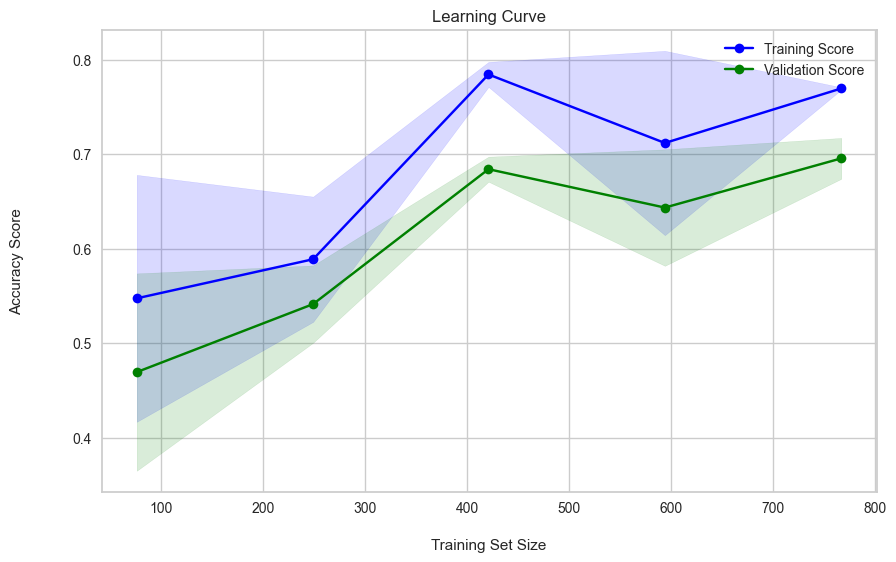

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(mlpR,
                                                        data_train,
                                                        target_train,
                                                        cv=5)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training Score')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, 'o-', color='green', label='Validation Score')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy Score')
plt.legend(loc='best')
plt.title('Learning Curve')

# Ajustar la posición de las etiquetas de las funciones de la gráfica
plt.gca().xaxis.set_label_coords(0.5, -0.1)  # Ajustar la posición de la etiqueta del eje x
plt.gca().yaxis.set_label_coords(-0.1, 0.5)  # Ajustar la posición de la etiqueta del eje y
plt.gca().title.set_position([.5, 1.05])  # Ajustar la posición del título

plt.show()

In [ ]:
data_train, data_test, target_train, target_test = train_test_split(
    data, toRegresion, train_size=0.7,test_size=0.3)

## Tuneo de Parametros

In [ ]:
parametros_tun  = param_grid = {
    'mlpclassifier__max_iter': (100,200,500,1000),
    'mlpclassifier__learning_rate_init': (0.01, 0.1, 1,10),
    'mlpclassifier__hidden_layer_sizes':((3,2),(5,3),(10,2))}
model_grid_search = GridSearchCV(mlpR, param_grid=parametros_tun,
                                 n_jobs=2, cv=10) #Vamos a usar dos procesadores(n_jobs), y 10 k-folds
model_grid_search.fit(data_train, target_train)

Iteration 1, loss = 1.24652472
Iteration 2, loss = 1.12201493
Iteration 3, loss = 1.04264060
Iteration 4, loss = 0.98334879
Iteration 5, loss = 0.93397370
Iteration 6, loss = 0.89323527
Iteration 7, loss = 0.85766318
Iteration 8, loss = 0.82531618
Iteration 9, loss = 0.79609359
Iteration 10, loss = 0.76862284
Iteration 11, loss = 0.74258880
Iteration 12, loss = 0.71776523
Iteration 13, loss = 0.69424633
Iteration 14, loss = 0.67169165
Iteration 15, loss = 0.64976870
Iteration 16, loss = 0.62860899
Iteration 17, loss = 0.60869268
Iteration 18, loss = 0.59052776
Iteration 19, loss = 0.57258649
Iteration 20, loss = 0.55695456
Iteration 21, loss = 0.54253301
Iteration 22, loss = 0.52981257
Iteration 23, loss = 0.51779505
Iteration 24, loss = 0.50714258
Iteration 25, loss = 0.49787494
Iteration 26, loss = 0.48943037
Iteration 27, loss = 0.48200575
Iteration 28, loss = 0.47512094
Iteration 29, loss = 0.46921220
Iteration 30, loss = 0.46351409
Iteration 31, loss = 0.45870208
Iteration 32, los

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('one_hot_encoder',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         []),
                                                                        ('standard_scaler',
                                                                         StandardScaler(),
                                                                         ['MSSubClass',
                                                                          'LotFrontage',
                                                                          'LotArea',
                                                                          'OverallQual',
                                                                          'OverallCond',
                                                                          'YearBuilt',
                                                                          'YearRemodAdd',
                                                                          'MasVnrArea',
                                                                          'BsmtFinSF1',
                                                                          'BsmtFinSF2',
                                                                          'BsmtUnfSF',
                                                                          'TotalBsmt...
                                                                          'GarageYrBlt',
                                                                          'GarageCars',
                                                                          'GarageArea',
                                                                          'WoodDeckSF',
                                                                          'OpenPorchSF',
                                                                          'EnclosedPorch', ...])])),
                                       ('mlpclassifier',
                                        MLPClassifier(activation='logistic',
                                                      hidden_layer_sizes=(5, 3),
                                                      verbose=True))]),
             n_jobs=2,
             param_grid={'mlpclassifier__hidden_layer_sizes': ((3, 2), (5, 3),
                                                               (10, 2)),
                         'mlpclassifier__learning_rate_init': (0.01, 0.1, 1,
                                                               10),
                         'mlpclassifier__max_iter': (100, 200, 500, 1000)})

In [ ]:
X_predT = model_grid_search.predict(data_train)
print("-------------------- SVM regresion Model ------------------------------------")
print("Root Mean squared error: %.2f" % root_mean_squared_error(target_train, X_predT))
print("Mean squared error: %.2f" % mean_squared_error(target_train, X_predT))
print('R^2 score: %.2f' % r2_score(target_train, X_predT))


In [67]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(mlpR,
                                                        data_train,
                                                        target_train,
                                                        cv=5)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training Score')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, 'o-', color='green', label='Validation Score')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy Score')
plt.legend(loc='best')
plt.title('Learning Curve')

# Ajustar la posición de las etiquetas de las funciones de la gráfica
plt.gca().xaxis.set_label_coords(0.5, -0.1)  # Ajustar la posición de la etiqueta del eje x
plt.gca().yaxis.set_label_coords(-0.1, 0.5)  # Ajustar la posición de la etiqueta del eje y
plt.gca().title.set_position([.5, 1.05])  # Ajustar la posición del título

plt.show()

Matriz de confusión
 [[201   0  16]
 [  0   0  91]
 [ 25   1  78]]
Accuracy:  0.6771844660194175
Precision:  0.6771844660194175
recall:  0.6771844660194175
